In [228]:
import matplotlib
import networkx as nx

In [229]:
import pickle
with open('data/graph.pkl','rb') as f:
    G=pickle.load(f)    

In [230]:
iiitd_profs=[i for i in list(G.nodes) if G.nodes[i]['authorCategory']=='iiitd']
G_=G.subgraph(iiitd_profs)

# Group Metrics

In [231]:
print("Number of Nodes in the Heterogeneous Graph",G.number_of_nodes())
print("Number of Edges in the Heterogeneous Graph",G.number_of_edges())
print("Number of Nodes in the Homogeneous Graph",G_.number_of_nodes())
print("Number of Edges in the Homogeneous Graph",G_.number_of_edges())


Number of Nodes in the Heterogeneous Graph 4972
Number of Edges in the Heterogeneous Graph 8499
Number of Nodes in the Homogeneous Graph 142
Number of Edges in the Homogeneous Graph 567


### Density

In [232]:
print("Density of Homogenous Graph",nx.density(G_))
print("Fraction of Hetergeneous Graph",nx.density(G))

Density of Homogenous Graph 0.056637698531615224
Fraction of Hetergeneous Graph 0.0006877378740378831


# Single Node Metrics

### Degree Centrality

Homogeneous

In [233]:
deg_hom=list(G_.degree)
deg_hom.sort(key=lambda x: x[1],reverse=True)
deg_hom[:10]

[('anubha gupta', 48),
 ('shivam sharma', 36),
 ('amarjeet singh', 31),
 ('anuradha sharma', 29),
 ('rajiv ratn shah', 29),
 ('vivek kumar', 28),
 ('gaurav gupta', 27),
 ('angshul majumdar', 27),
 ('tanmoy chakraborty', 26),
 ('shikha singh', 24)]

Heterogeneous

In [234]:
deg_het=list(G.degree)
deg_het=[i for i in deg_het if G.nodes[i[0]]['authorCategory']=='iiitd']
deg_het.sort(key=lambda x: x[1],reverse=True)
deg_het[:10]

[('gaurav gupta', 456),
 ('ponnurangam kumaraguru', 342),
 ('anubha gupta', 334),
 ('rajiv ratn shah', 330),
 ('kuldeep yadav', 320),
 ('mukesh mohania', 295),
 ('tanmoy chakraborty', 264),
 ('amarjeet singh', 244),
 ('vivek kumar', 225),
 ('gajendra ps raghava', 207)]

Helper Function

In [235]:
def process_dic(dic,reverse=True):
    l=list(dic.items())
    l=[i for i in l if G.nodes[i[0]]['authorCategory']=='iiitd']
    l.sort(key=lambda x:x[1],reverse=reverse)
    return l[:10]
    

### Closeness Centrality

Homogenous

In [236]:
process_dic(nx.closeness_centrality(G_))


[('anubha gupta', 0.5610022807510857),
 ('shivam sharma', 0.5197857866550876),
 ('amarjeet singh', 0.5053472925813352),
 ('anuradha sharma', 0.49940203031567243),
 ('vivek kumar', 0.4935950299631646),
 ('gaurav gupta', 0.49168925764670446),
 ('rajiv ratn shah', 0.489798145117294),
 ('tanmoy chakraborty', 0.48421109403230594),
 ('shikha singh', 0.48055667068111874),
 ('angshul majumdar', 0.4787500666560017)]

Heteterogeneous

In [237]:
process_dic(nx.closeness_centrality(G))

[('anubha gupta', 0.436295929794233),
 ('amarjeet singh', 0.4211297700725059),
 ('shivam sharma', 0.4186037741550312),
 ('vivek kumar', 0.41384889958014737),
 ('anuradha sharma', 0.40926842939399555),
 ('gaurav gupta', 0.4009234464498021),
 ('shikha singh', 0.3996300407027264),
 ('rajiv ratn shah', 0.3965913938428929),
 ('richa gupta', 0.3946016464659635),
 ('ponnurangam kumaraguru', 0.3913912223280493)]

### Betweenness Centrality

Homogenous

In [238]:
process_dic(nx.betweenness_centrality(G_))

[('anubha gupta', 0.1563164176744157),
 ('shivam sharma', 0.09049055726291315),
 ('amarjeet singh', 0.07671407029452824),
 ('angshul majumdar', 0.06332627207735565),
 ('rajiv ratn shah', 0.0611500077178178),
 ('vivek kumar', 0.05540743320707973),
 ('tanmoy chakraborty', 0.05532223787331491),
 ('anuradha sharma', 0.05414534503722779),
 ('ponnurangam kumaraguru', 0.051851848462302806),
 ('shikha singh', 0.048527553823166356)]

Heterogenous

In [239]:
process_dic(nx.betweenness_centrality(G))

[('gaurav gupta', 0.14078894270566383),
 ('anubha gupta', 0.125434641710254),
 ('ponnurangam kumaraguru', 0.09544477039498464),
 ('kuldeep yadav', 0.09444512828035687),
 ('rajiv ratn shah', 0.09092205020774284),
 ('amarjeet singh', 0.08973617702827869),
 ('mukesh mohania', 0.08388648160771053),
 ('vivek kumar', 0.07665545704683464),
 ('tanmoy chakraborty', 0.07476584866348555),
 ('n. arul murugan', 0.07076535045689847)]

### Clustering coeffient

Homogenous

In [240]:
print("Average Clustering:", nx.average_clustering(G_))
process_dic(nx.clustering(G_))

Average Clustering: 0.383202282826296


[('sarthak bhagat', 1.0),
 ('aditya chetan', 1.0),
 ('jyoti maggu', 1.0),
 ('kiriti kanjilal', 1.0),
 ('hitkul', 1.0),
 ('dhriti khanna', 1.0),
 ('mohd hamza naim shaikh', 1.0),
 ('sumeet patiyal', 1.0),
 ('divya sitani', 1.0),
 ('anupriya tuli', 1.0)]

Heterogenous

In [241]:
print("Average Clustering:", nx.average_clustering(G))
process_dic(nx.clustering(G))

Average Clustering: 0.20886683311494045


[('bushra ansari', 1.0),
 ('sneihil gopal', 1.0),
 ('megha gaur', 0.5),
 ('neeraj pandey', 0.4),
 ('anish madan', 0.39285714285714285),
 ('sambhav malhotra', 0.3333333333333333),
 ('aditya chetan', 0.3055555555555556),
 ('harshit singh chhabra', 0.3),
 ('hitkul', 0.2857142857142857),
 ('palash aggrawal', 0.26666666666666666)]

In [281]:
authors=['anubha gupta','rajiv ratn shah','angshul majumdar','tanmoy chakraborty','gajendra ps raghava','mayank vatsa','ponnurangam kumaraguru','gaurav gupta']
def draw_homogenous_graph(author):
        g=nx.Graph()
        weight_list=[x for x in list(G_.edges(author,data='weight')) if x[2]>2]
        g.add_weighted_edges_from(weight_list)
        import matplotlib
        from matplotlib.pyplot import figure
        import matplotlib.pyplot as plt
        import numpy as np
        figure(figsize=(40,22))
        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : 25}
        matplotlib.rc('font', **font)
        pos=nx.circular_layout(g)
        pos[author]=np.array([0,0])
        colors=[x[2] for x in list(g.edges(data='weight'))]
        cmap=plt.get_cmap('jet')
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(colors), vmax=max(colors)))
        nx.draw_networkx(g,pos=pos,edge_color=colors,edge_cmap=cmap,width=6,font_size=30)
        nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight'),font_size=30)
        plt.colorbar(sm)
        plt.show()

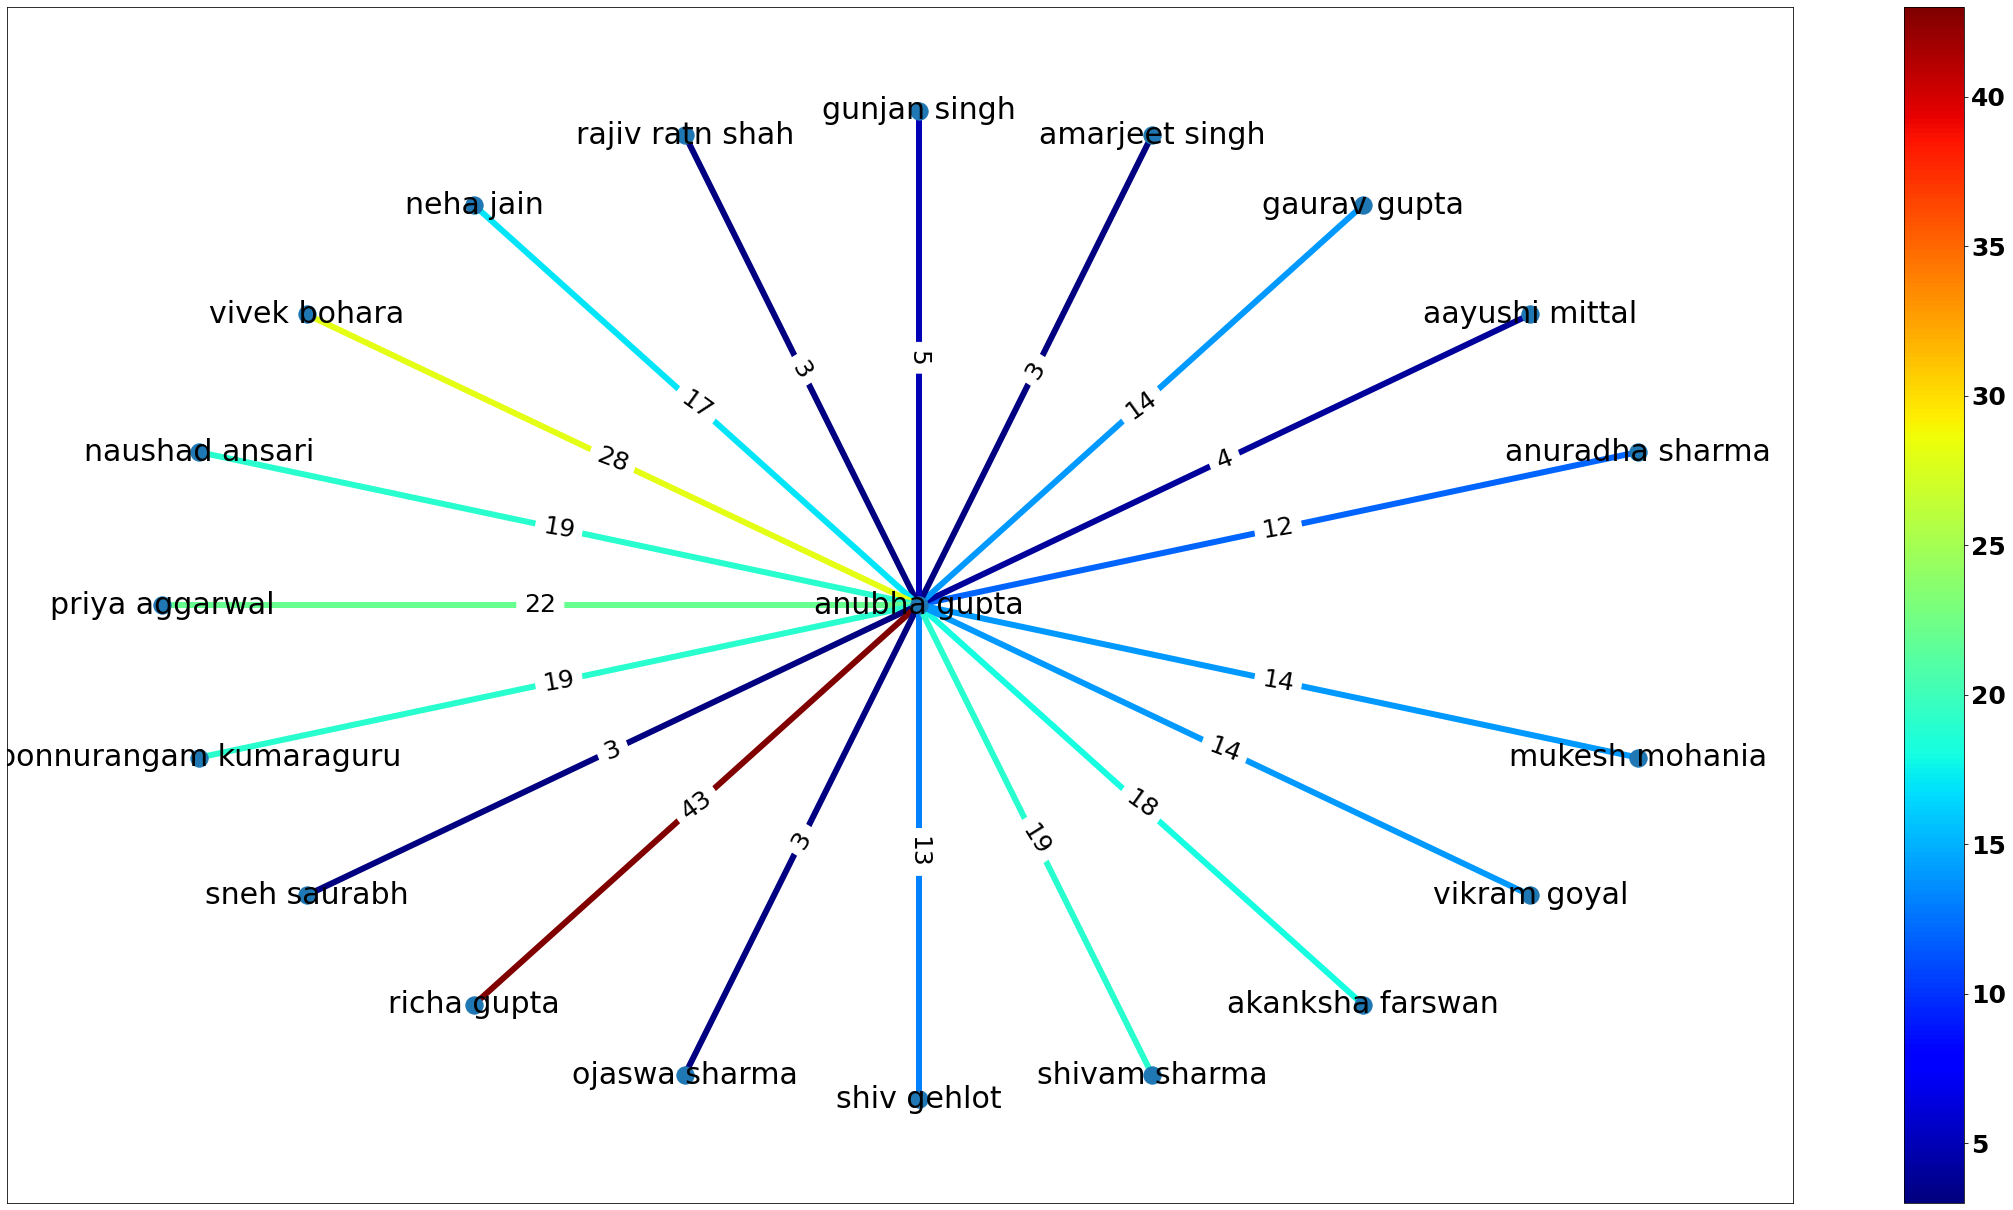

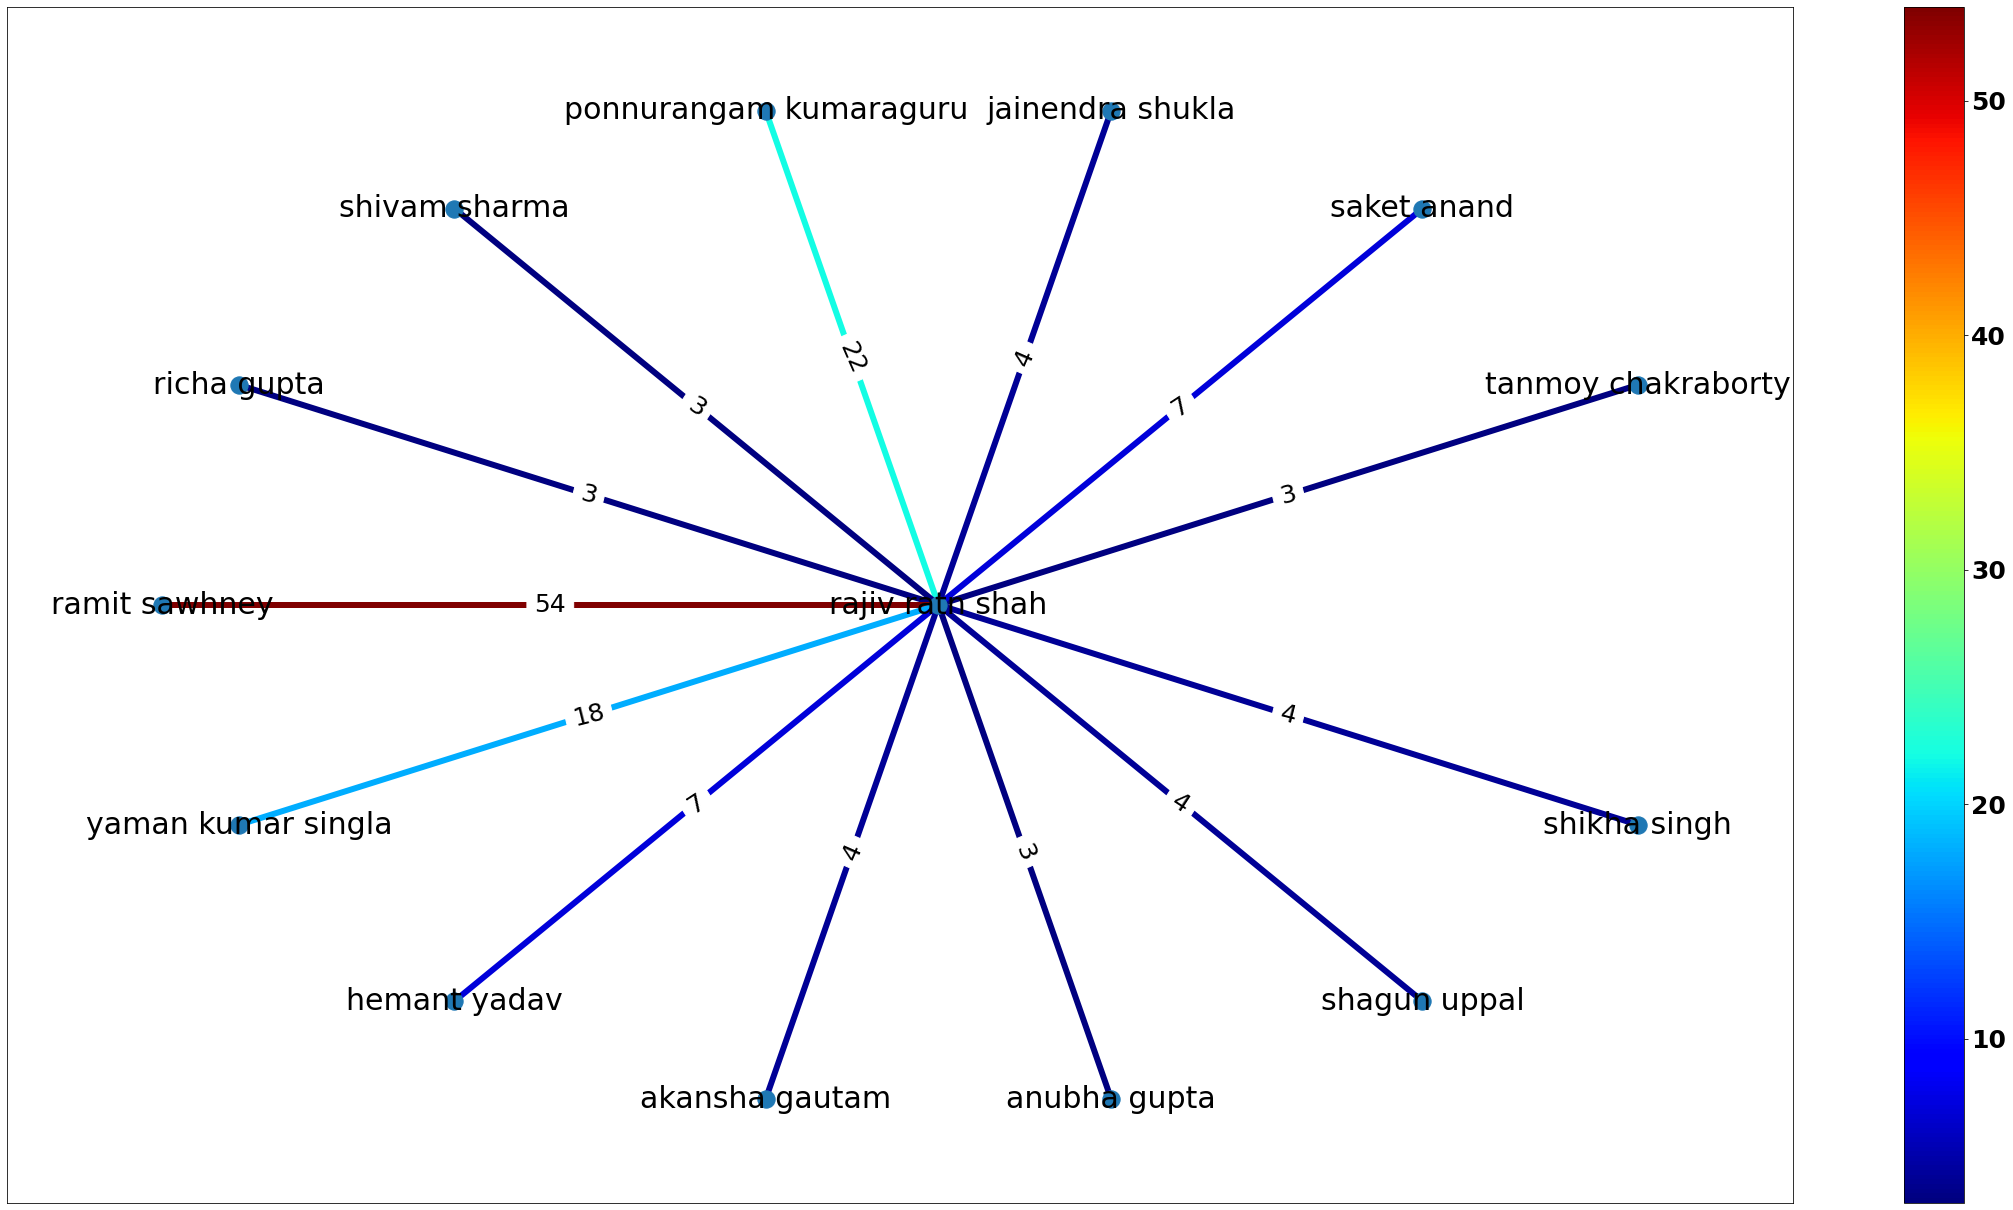

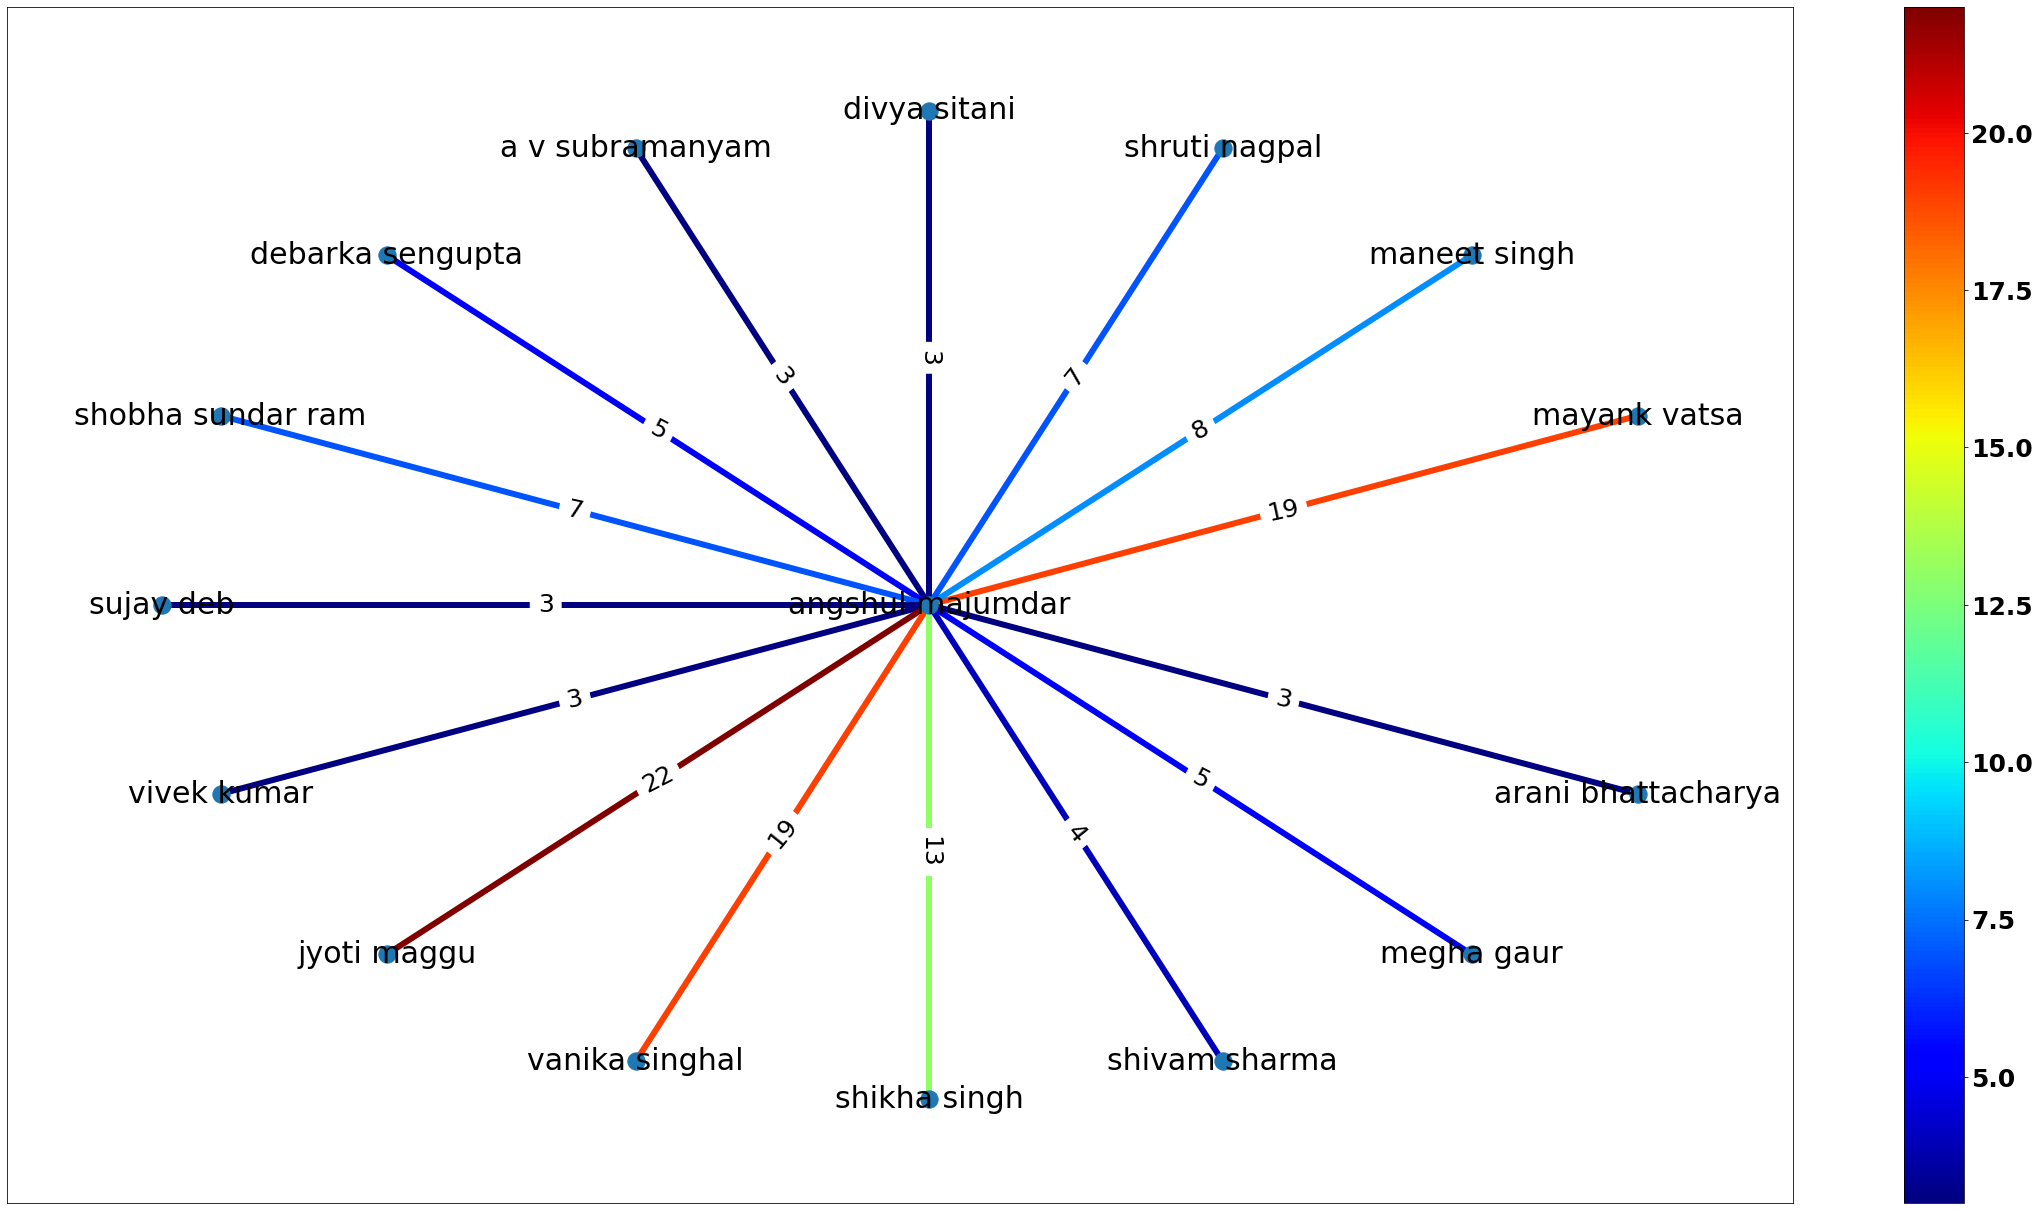

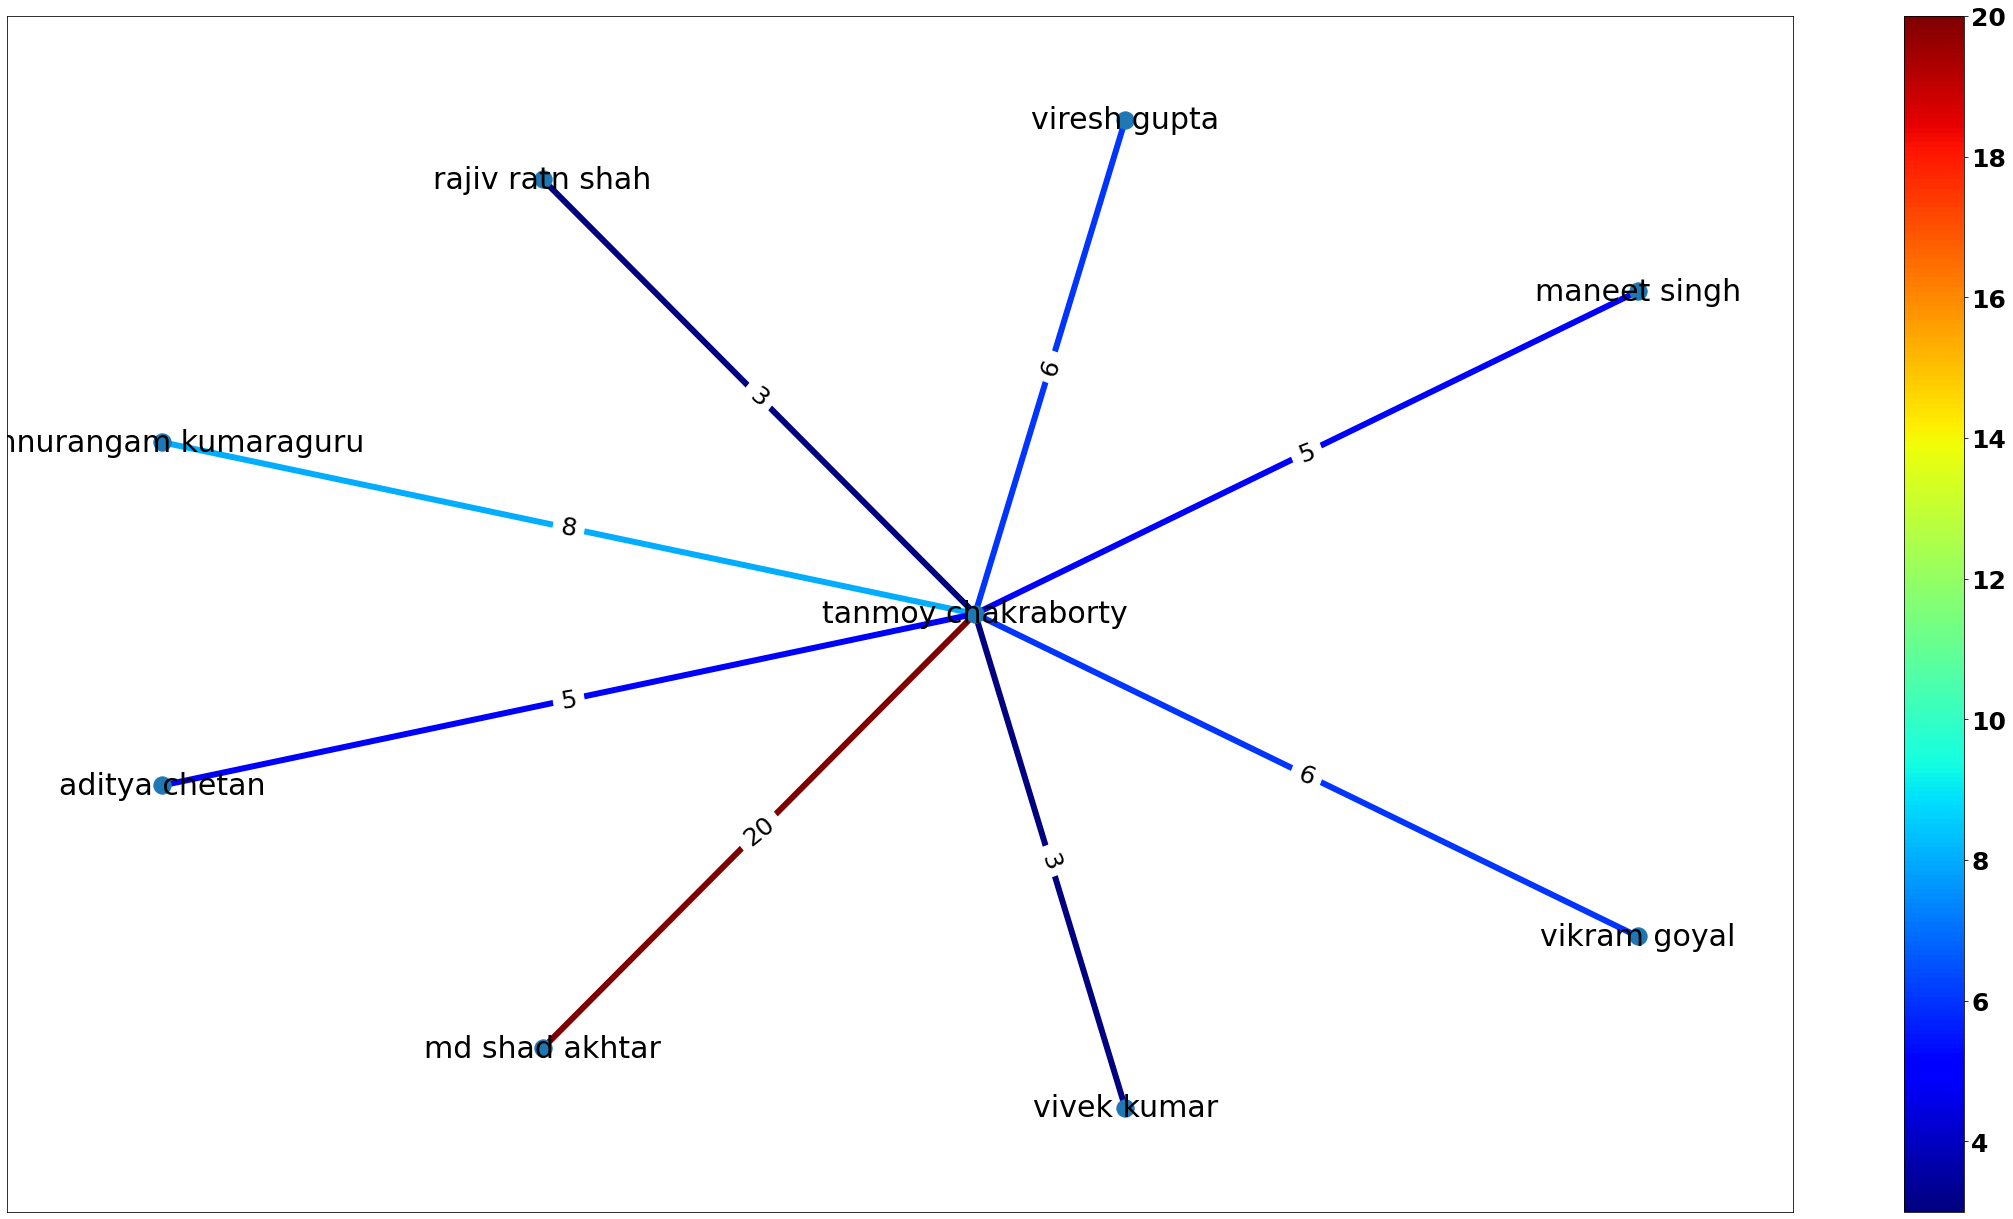

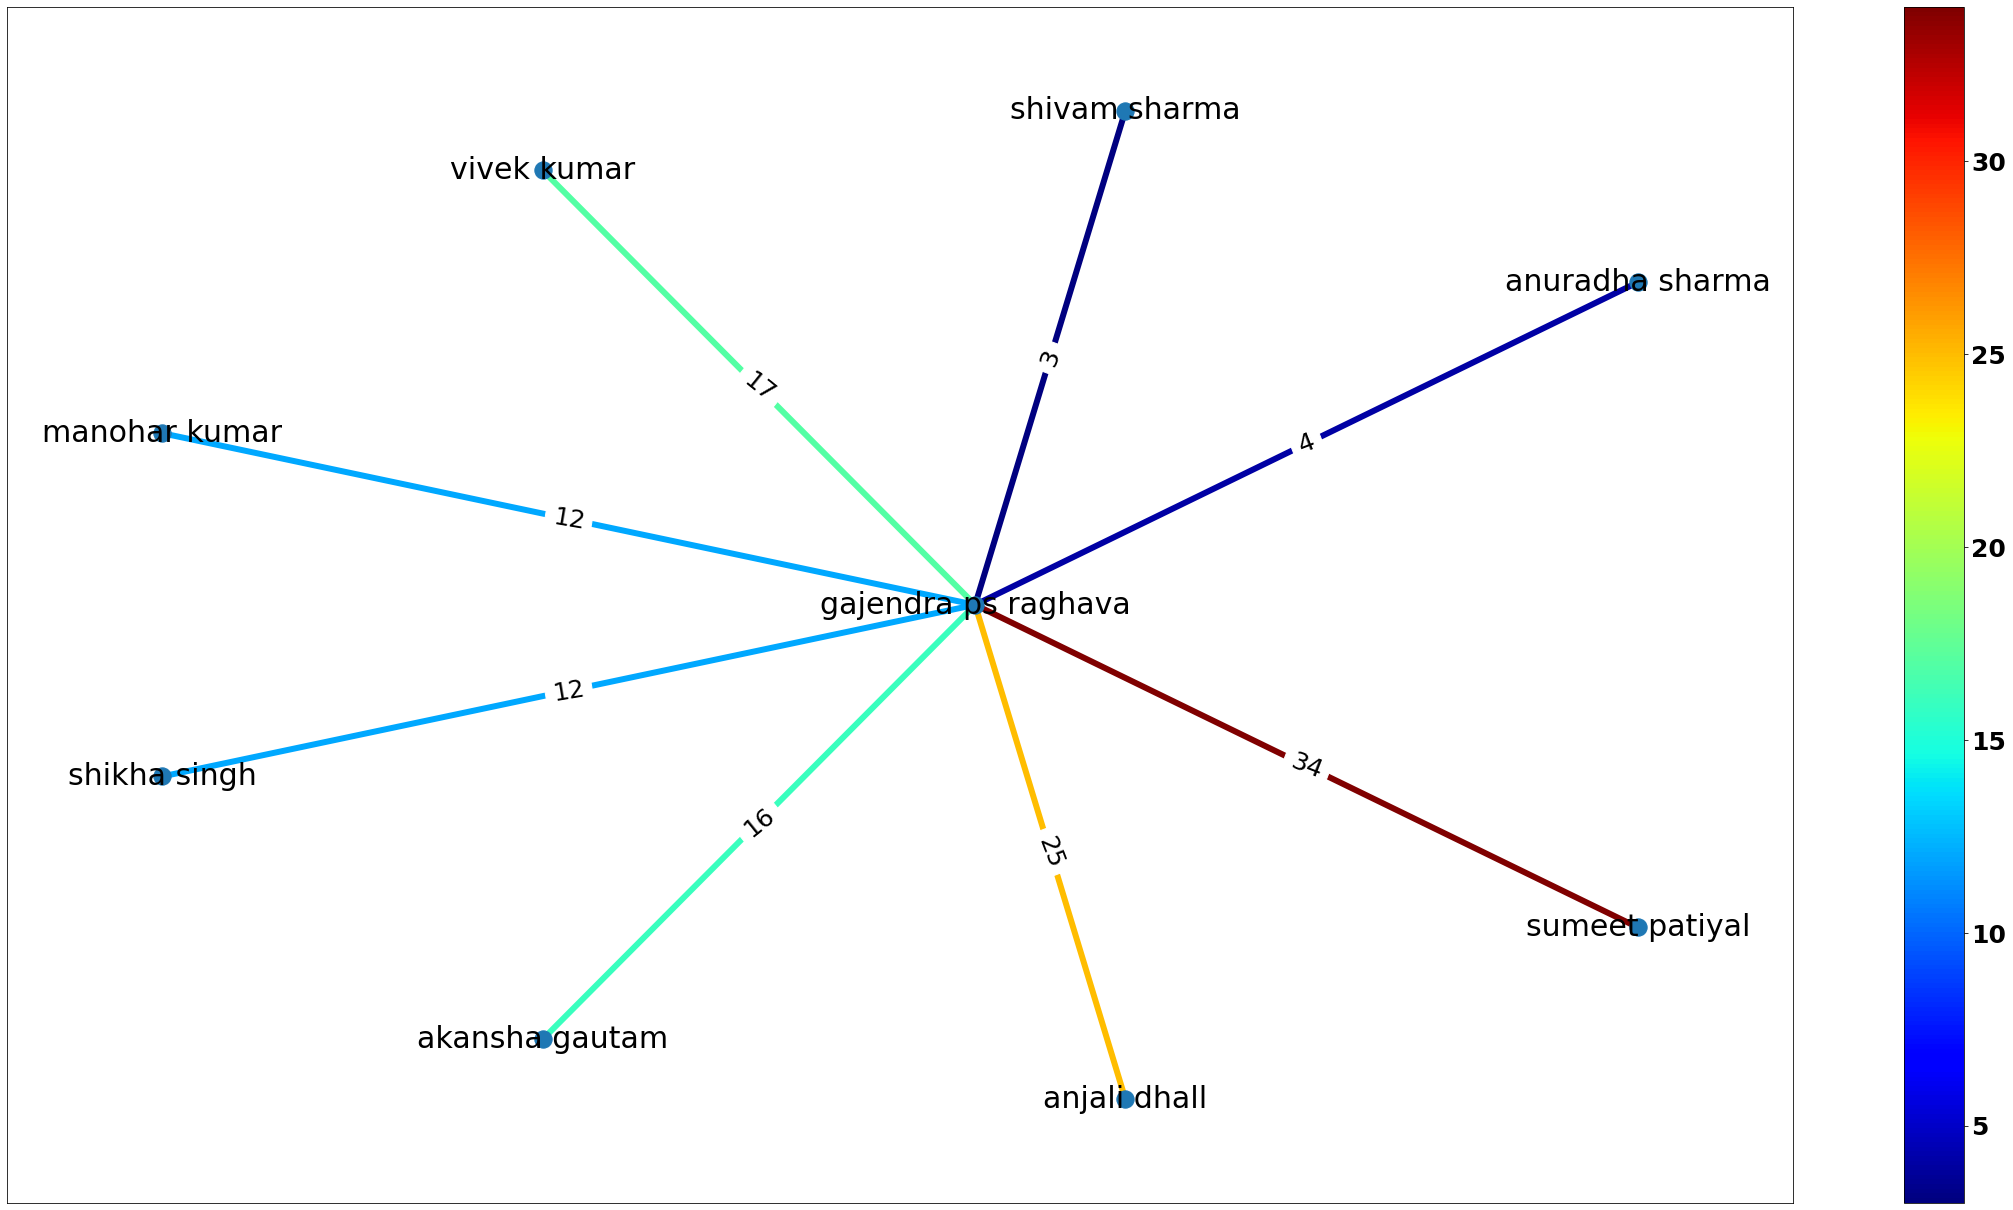

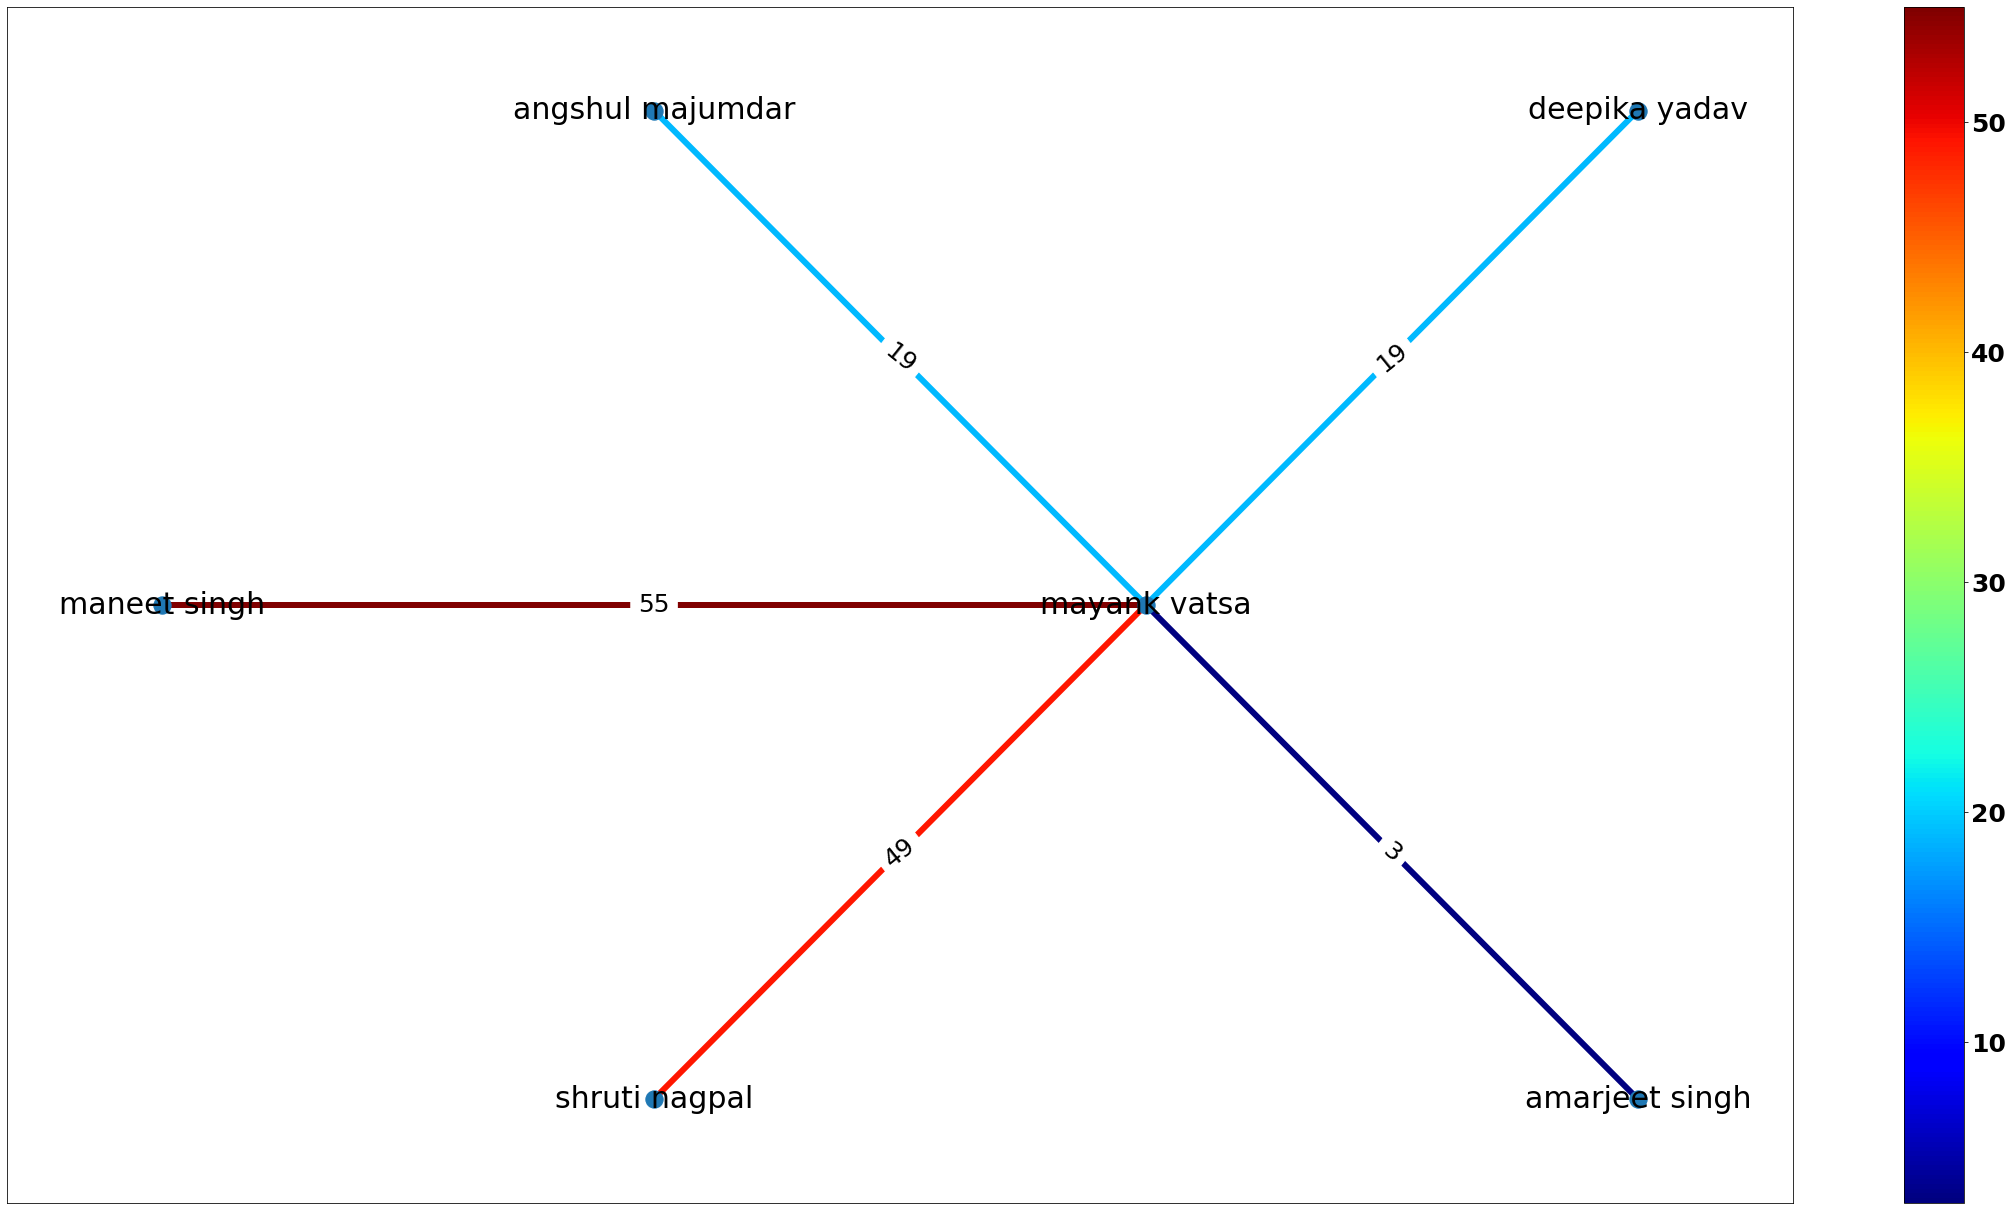

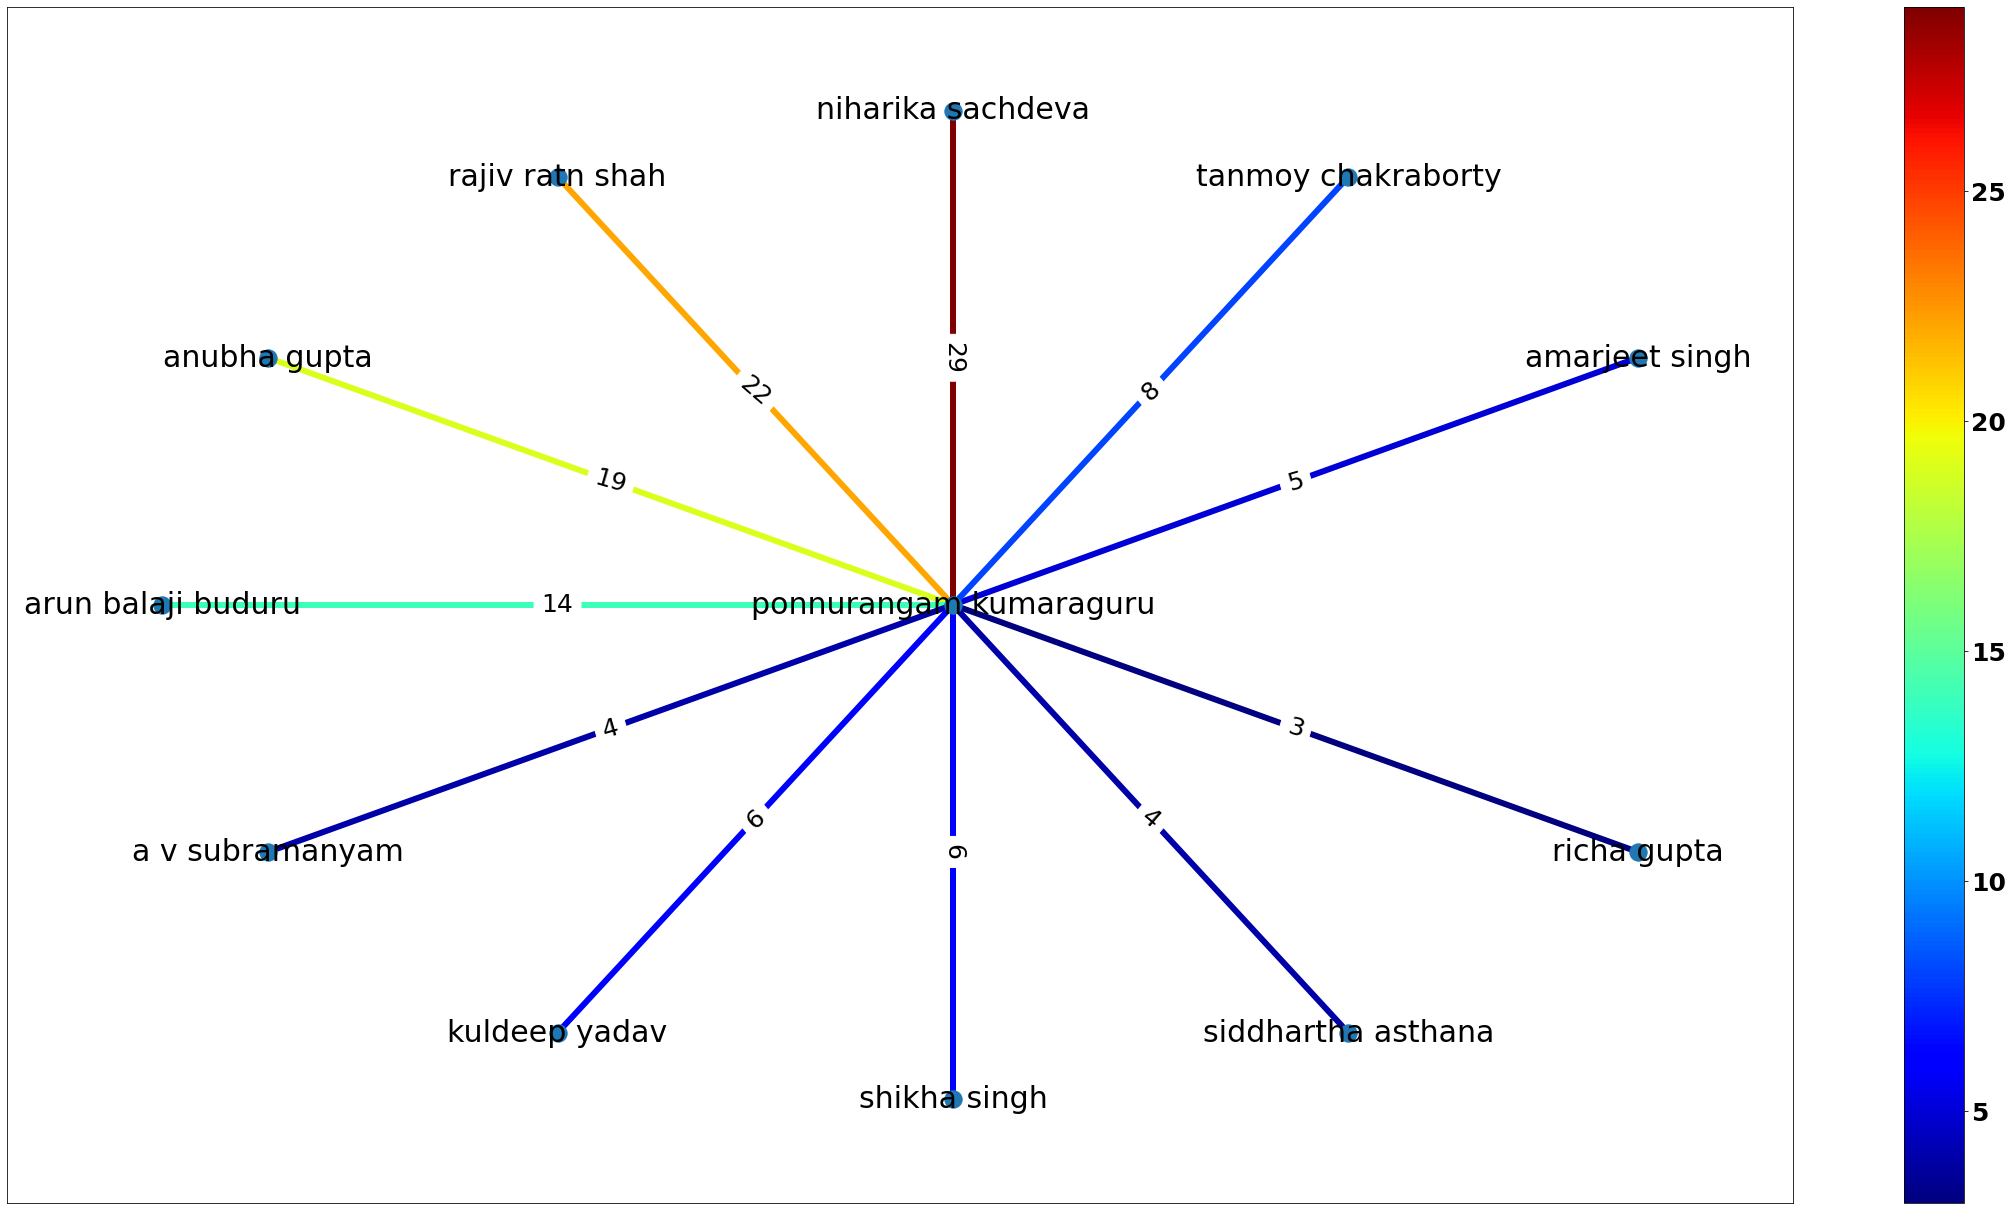

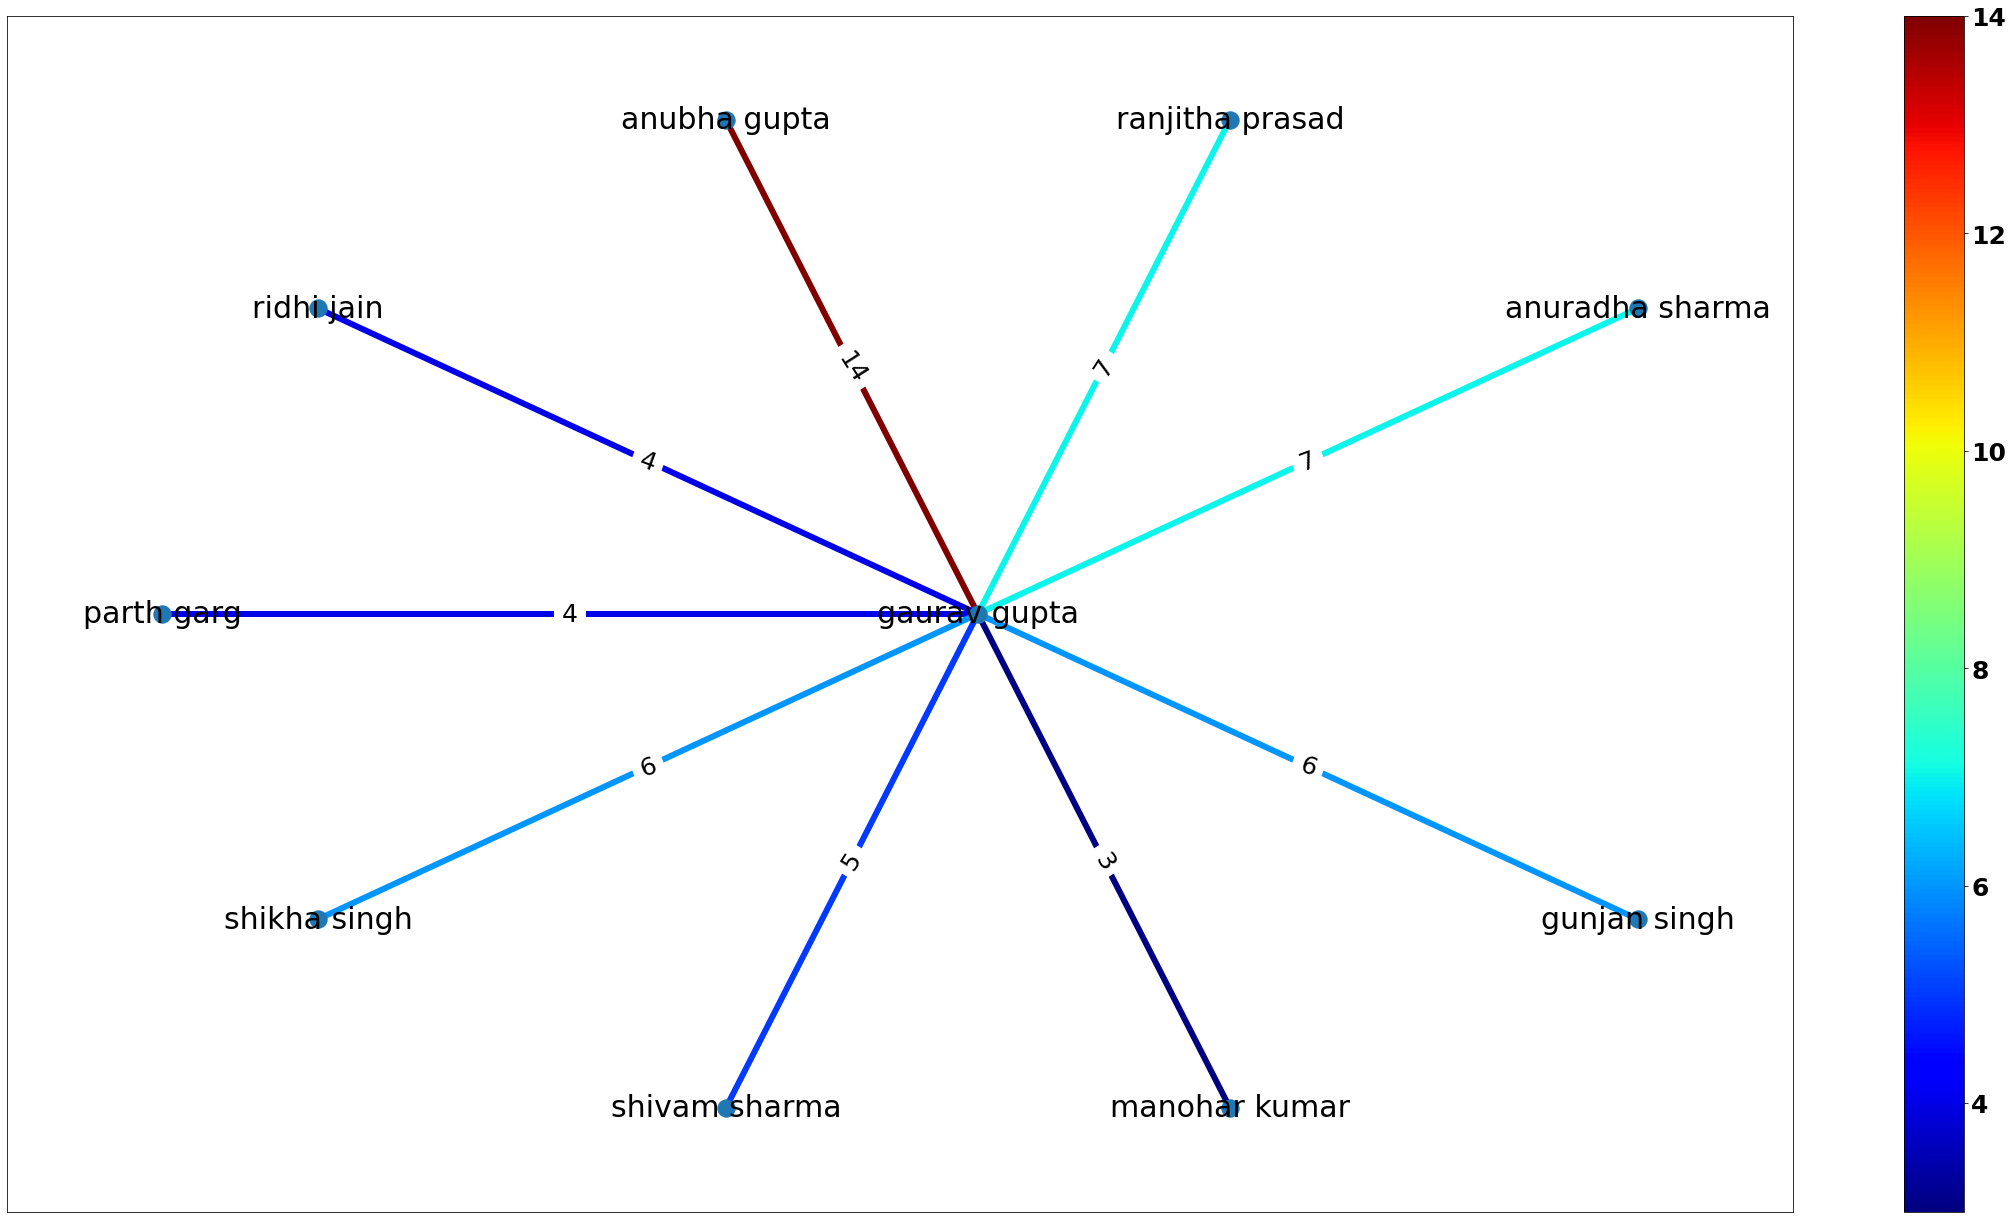

In [280]:
for author in authors:
    draw_homogenous_graph(author)

In [282]:
authors=['anubha gupta','rajiv ratn shah','angshul majumdar','tanmoy chakraborty','gajendra ps raghava','mayank vatsa','ponnurangam kumaraguru','gaurav gupta']
def draw_heterogenous_graph(author):
        g=nx.Graph()
        weight_list=[x for x in list(G.edges(author,data='weight')) if x[2]>10]
        g.add_weighted_edges_from(weight_list)
        import matplotlib
        from matplotlib.pyplot import figure
        import matplotlib.pyplot as plt
        import numpy as np
        figure(figsize=(40,22))
        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : 25}
        matplotlib.rc('font', **font)
        pos=nx.circular_layout(g)
        pos[author]=np.array([0,0])
        colors=[x[2] for x in list(g.edges(data='weight'))]
        cmap=plt.get_cmap('jet')
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(colors), vmax=max(colors)))
        nx.draw_networkx(g,pos=pos,edge_color=colors,edge_cmap=cmap,width=6,font_size=30)
        nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,'weight'),font_size=30)
        plt.colorbar(sm)
        plt.show()

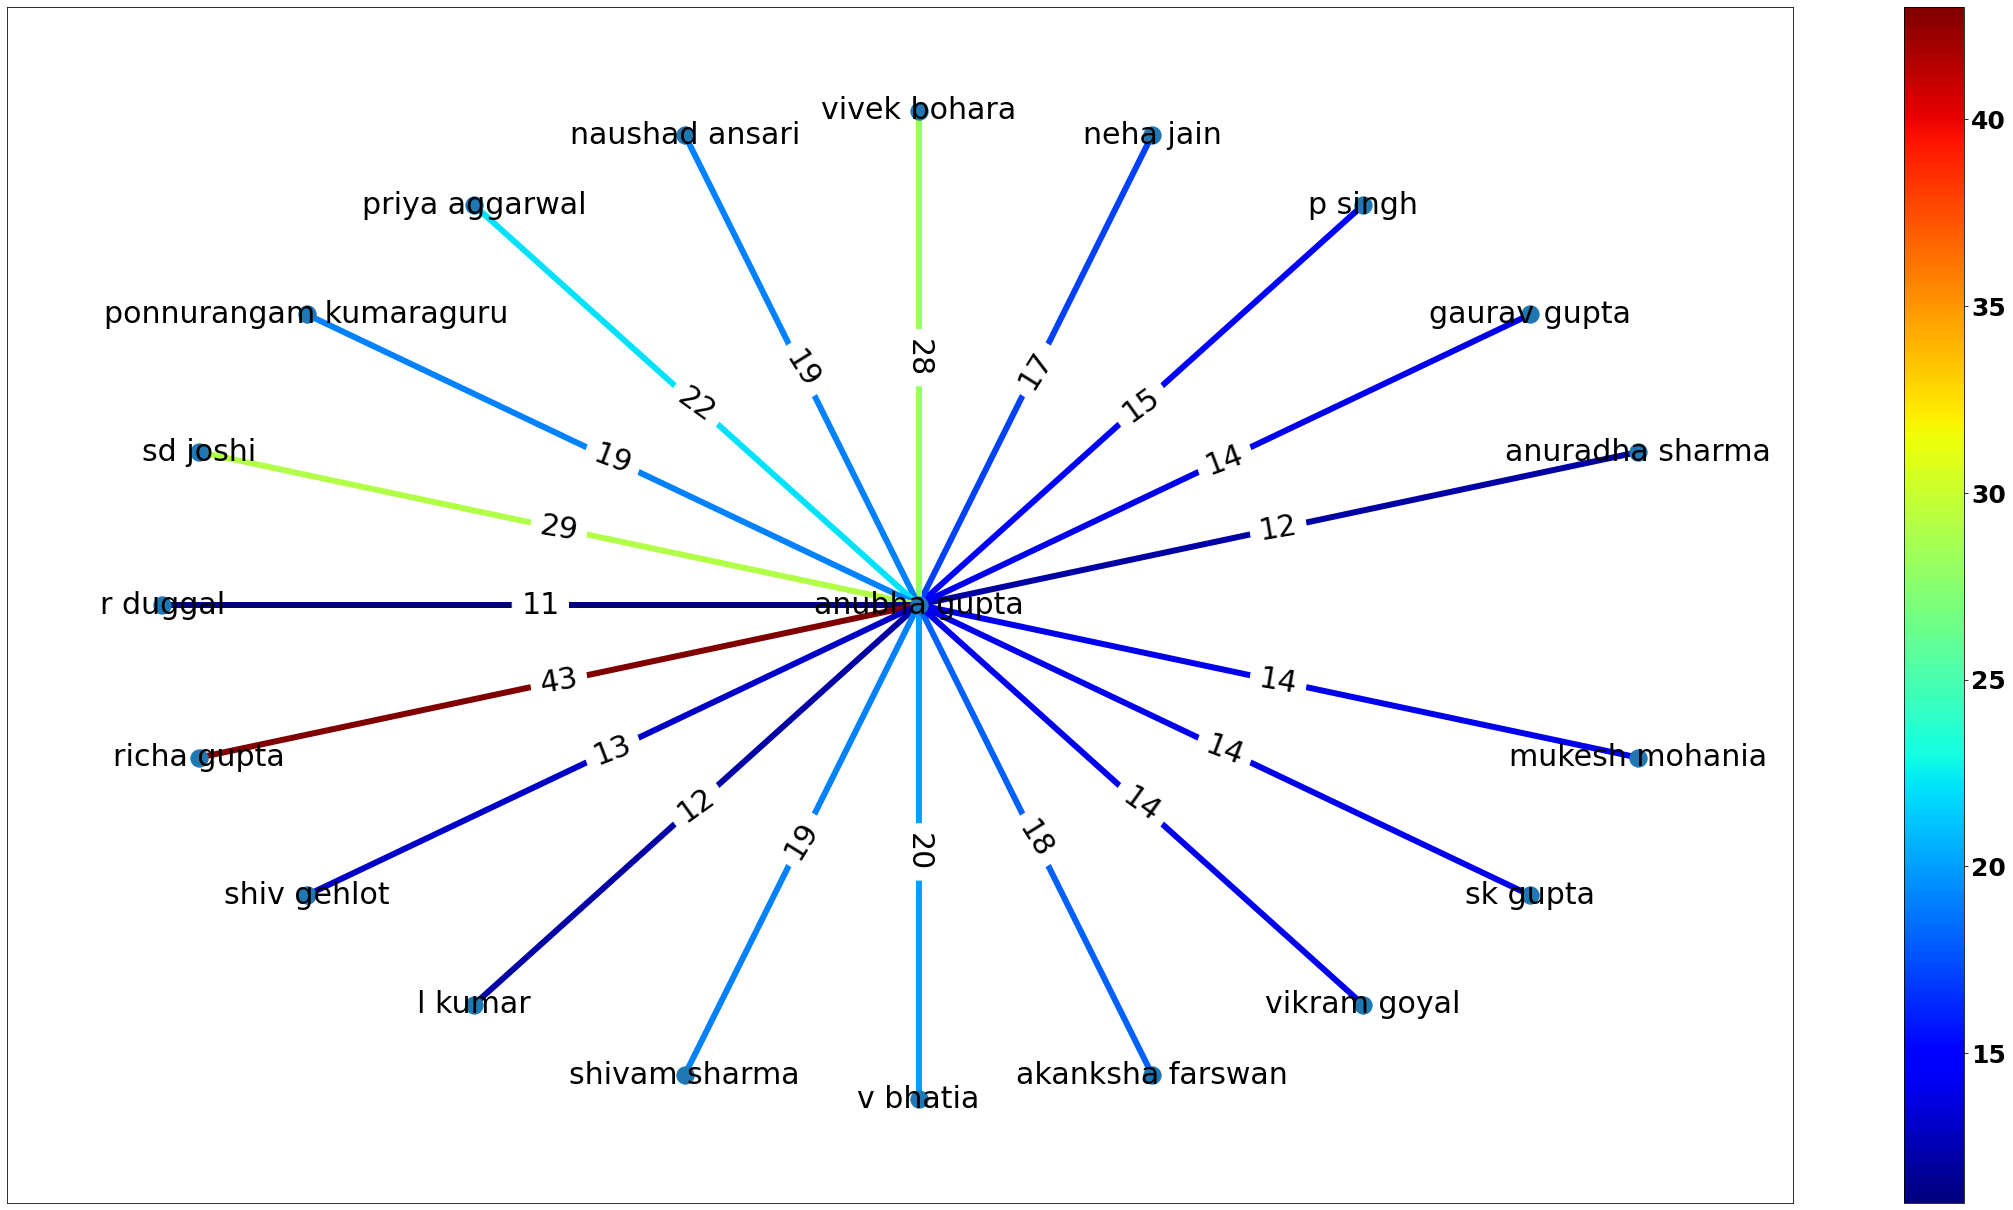

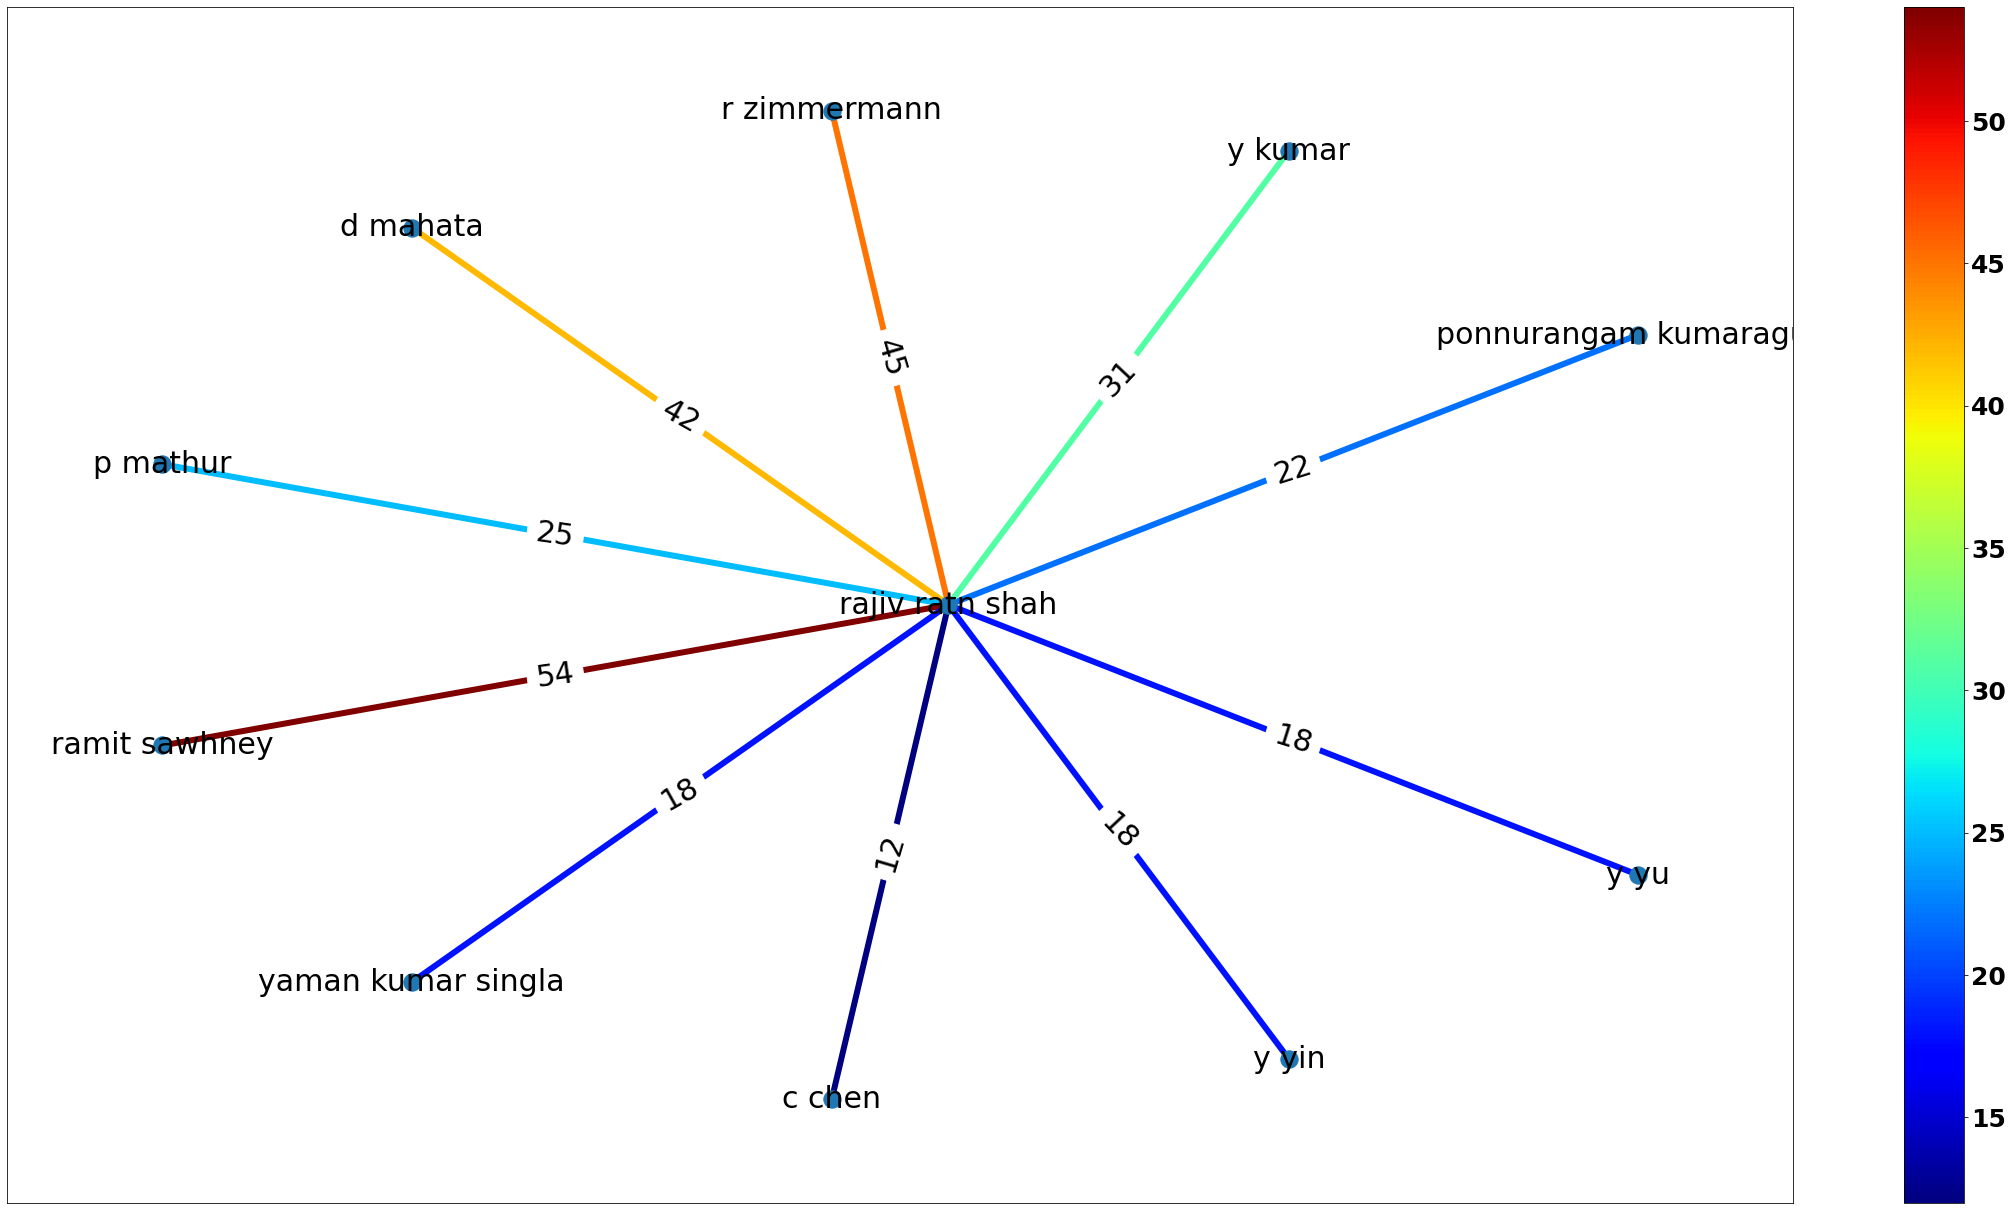

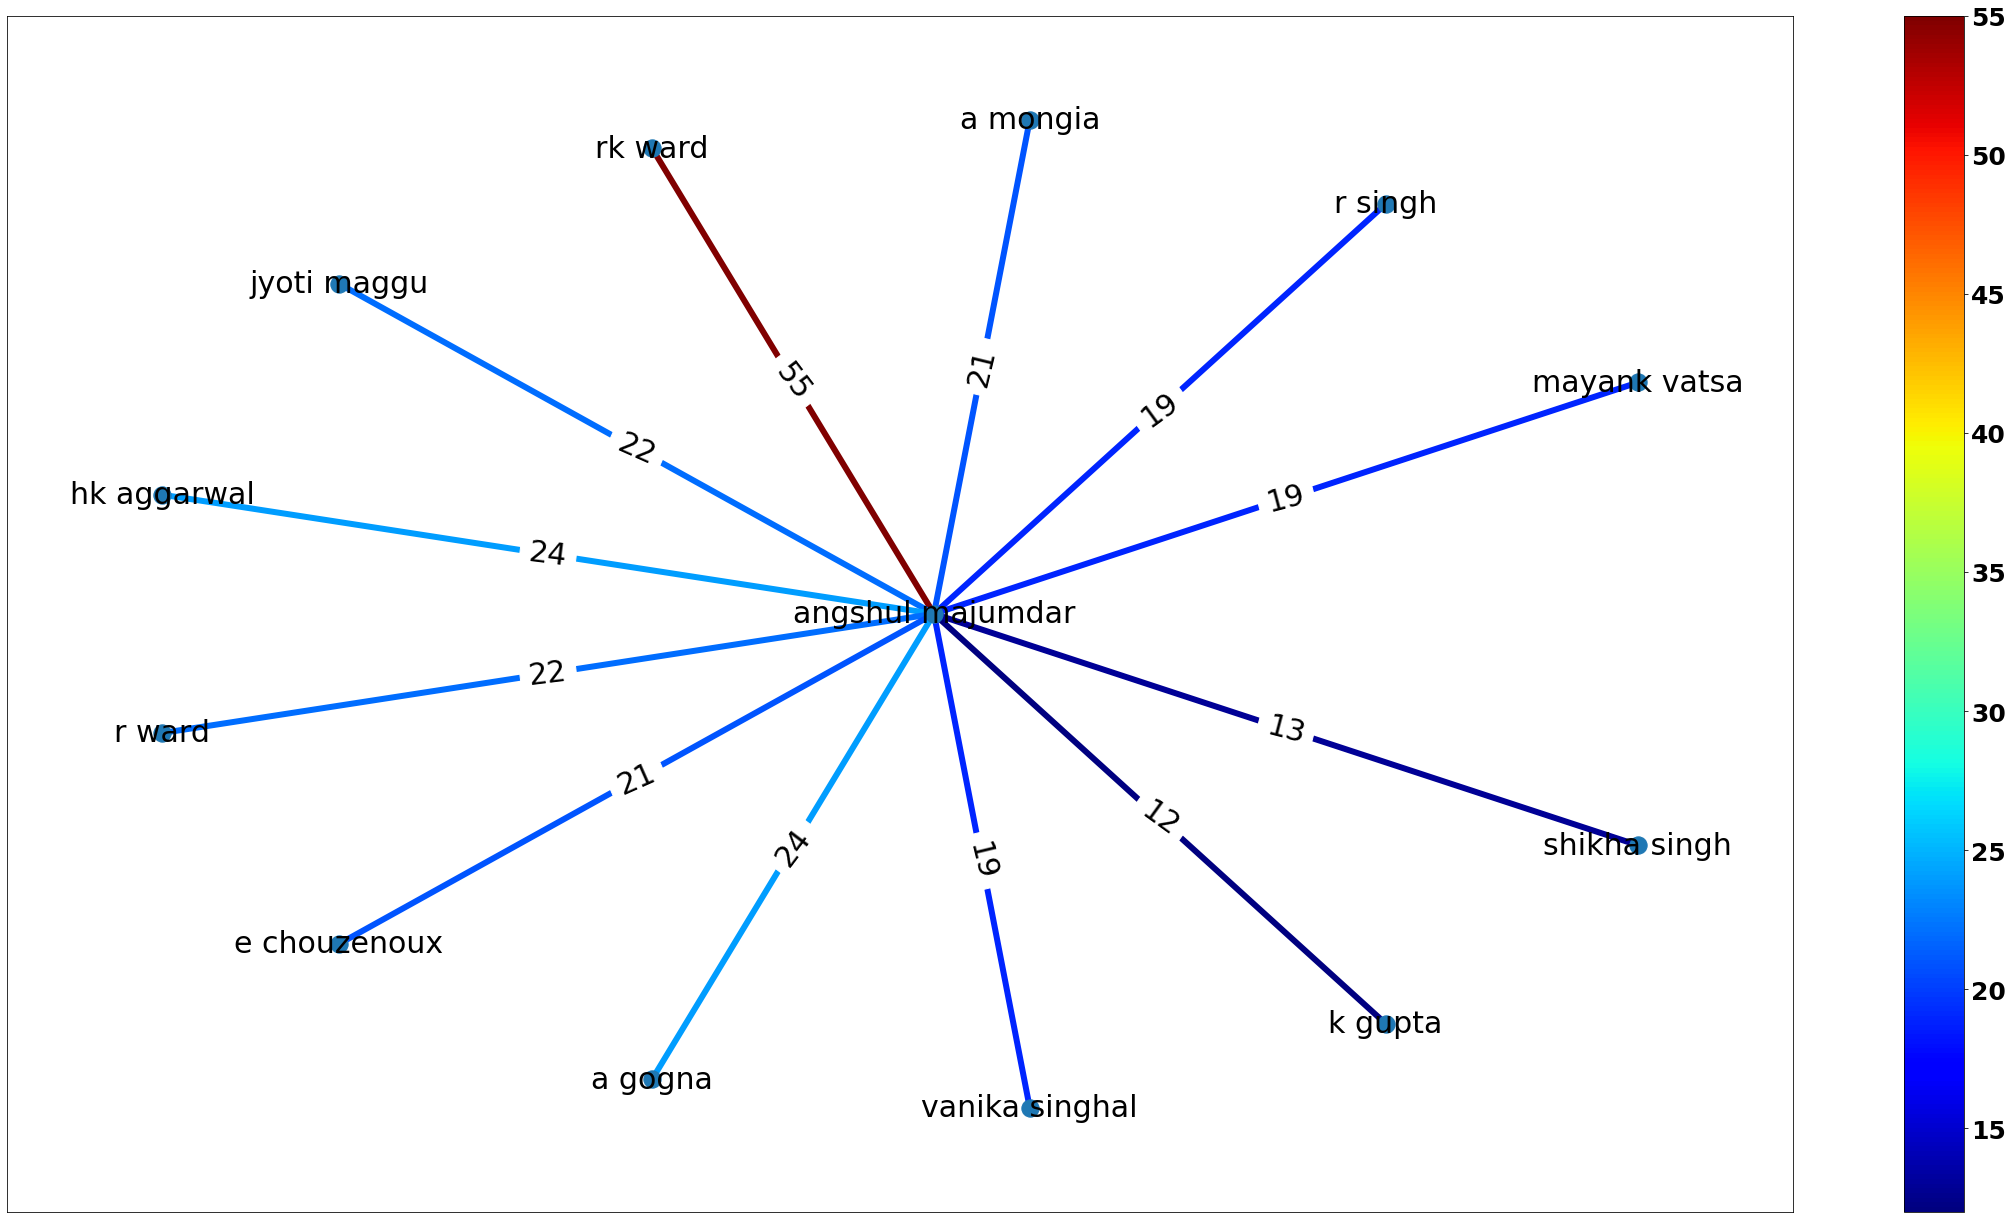

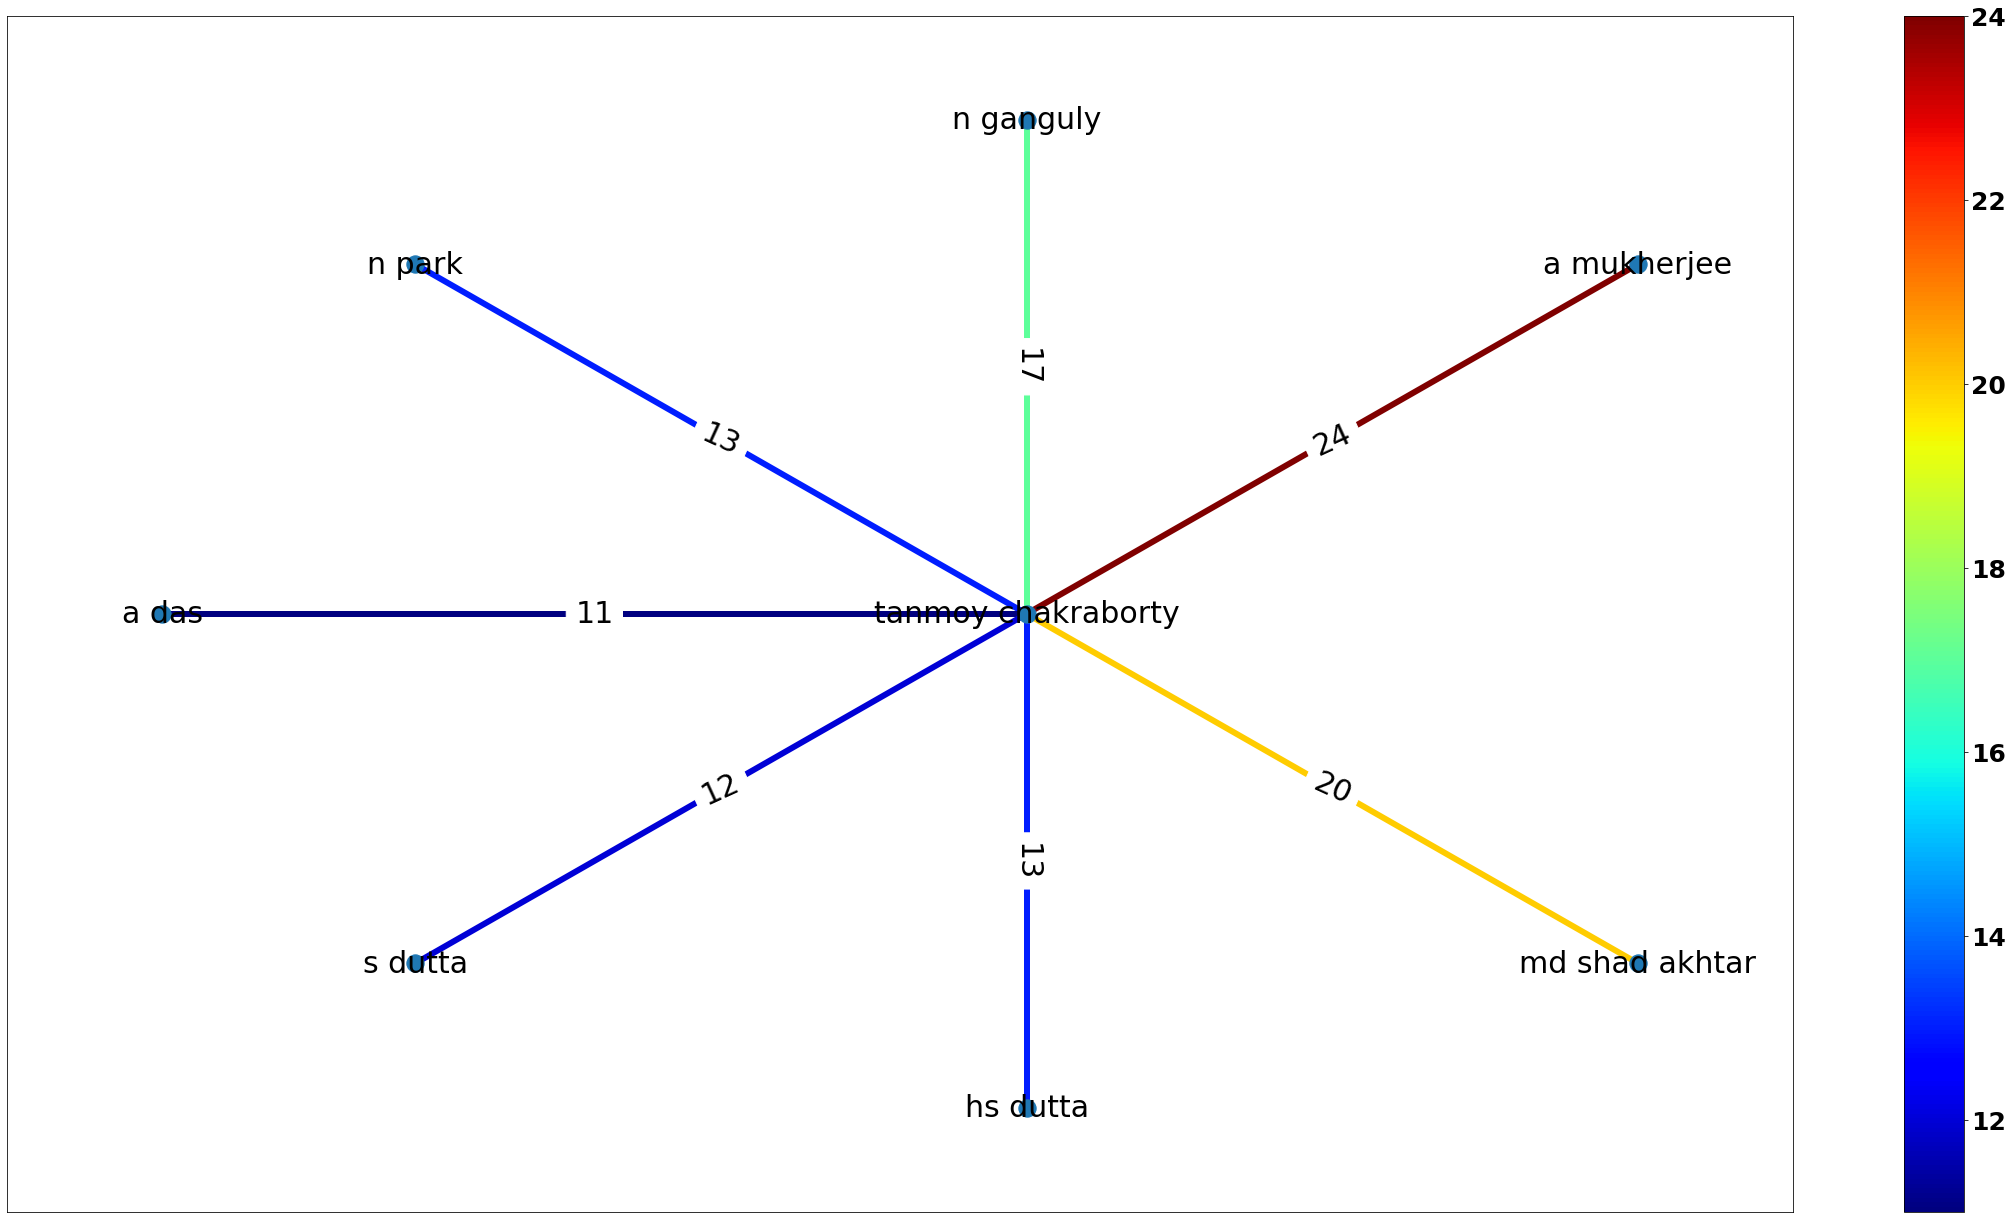

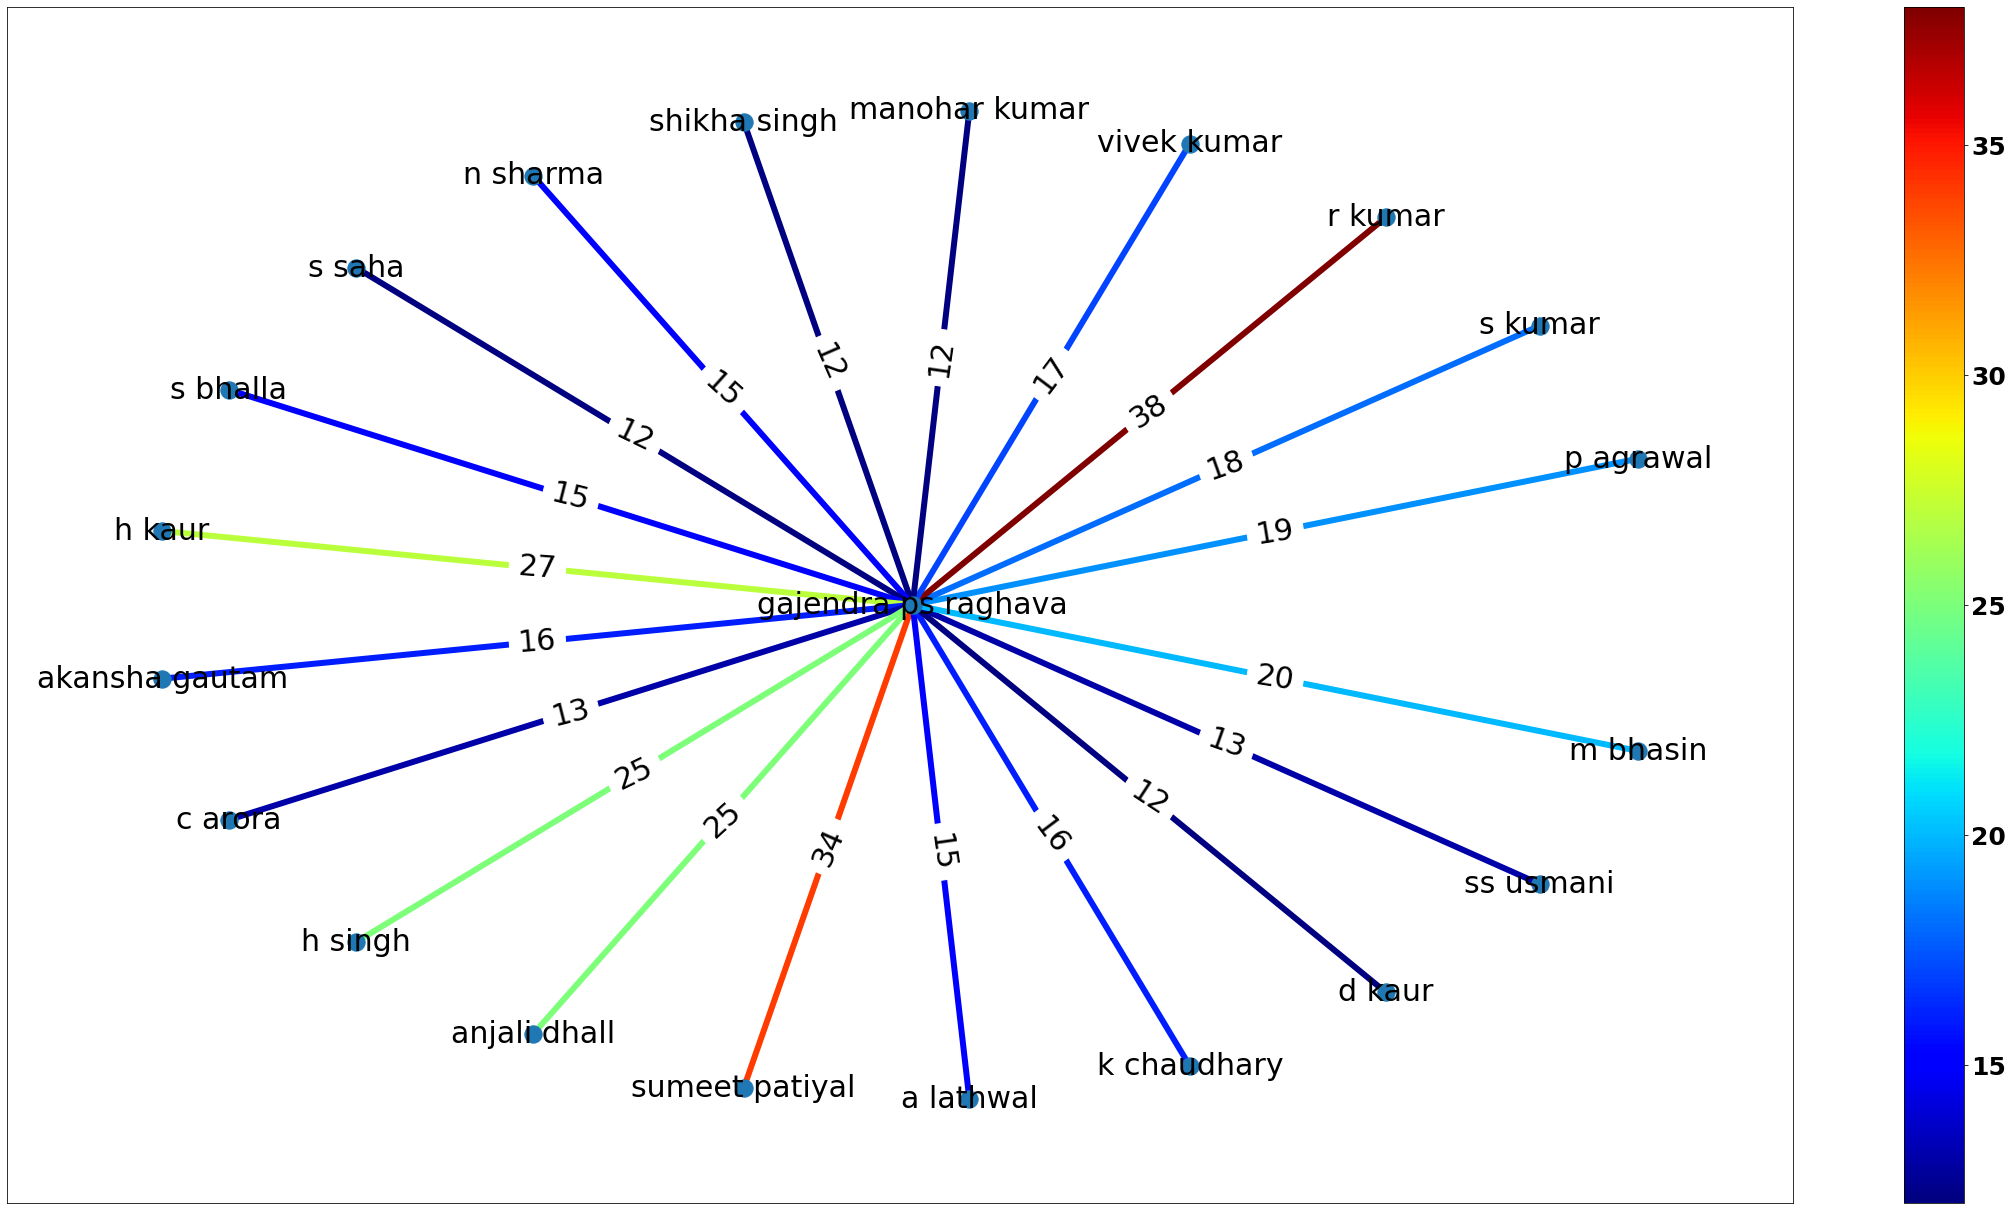

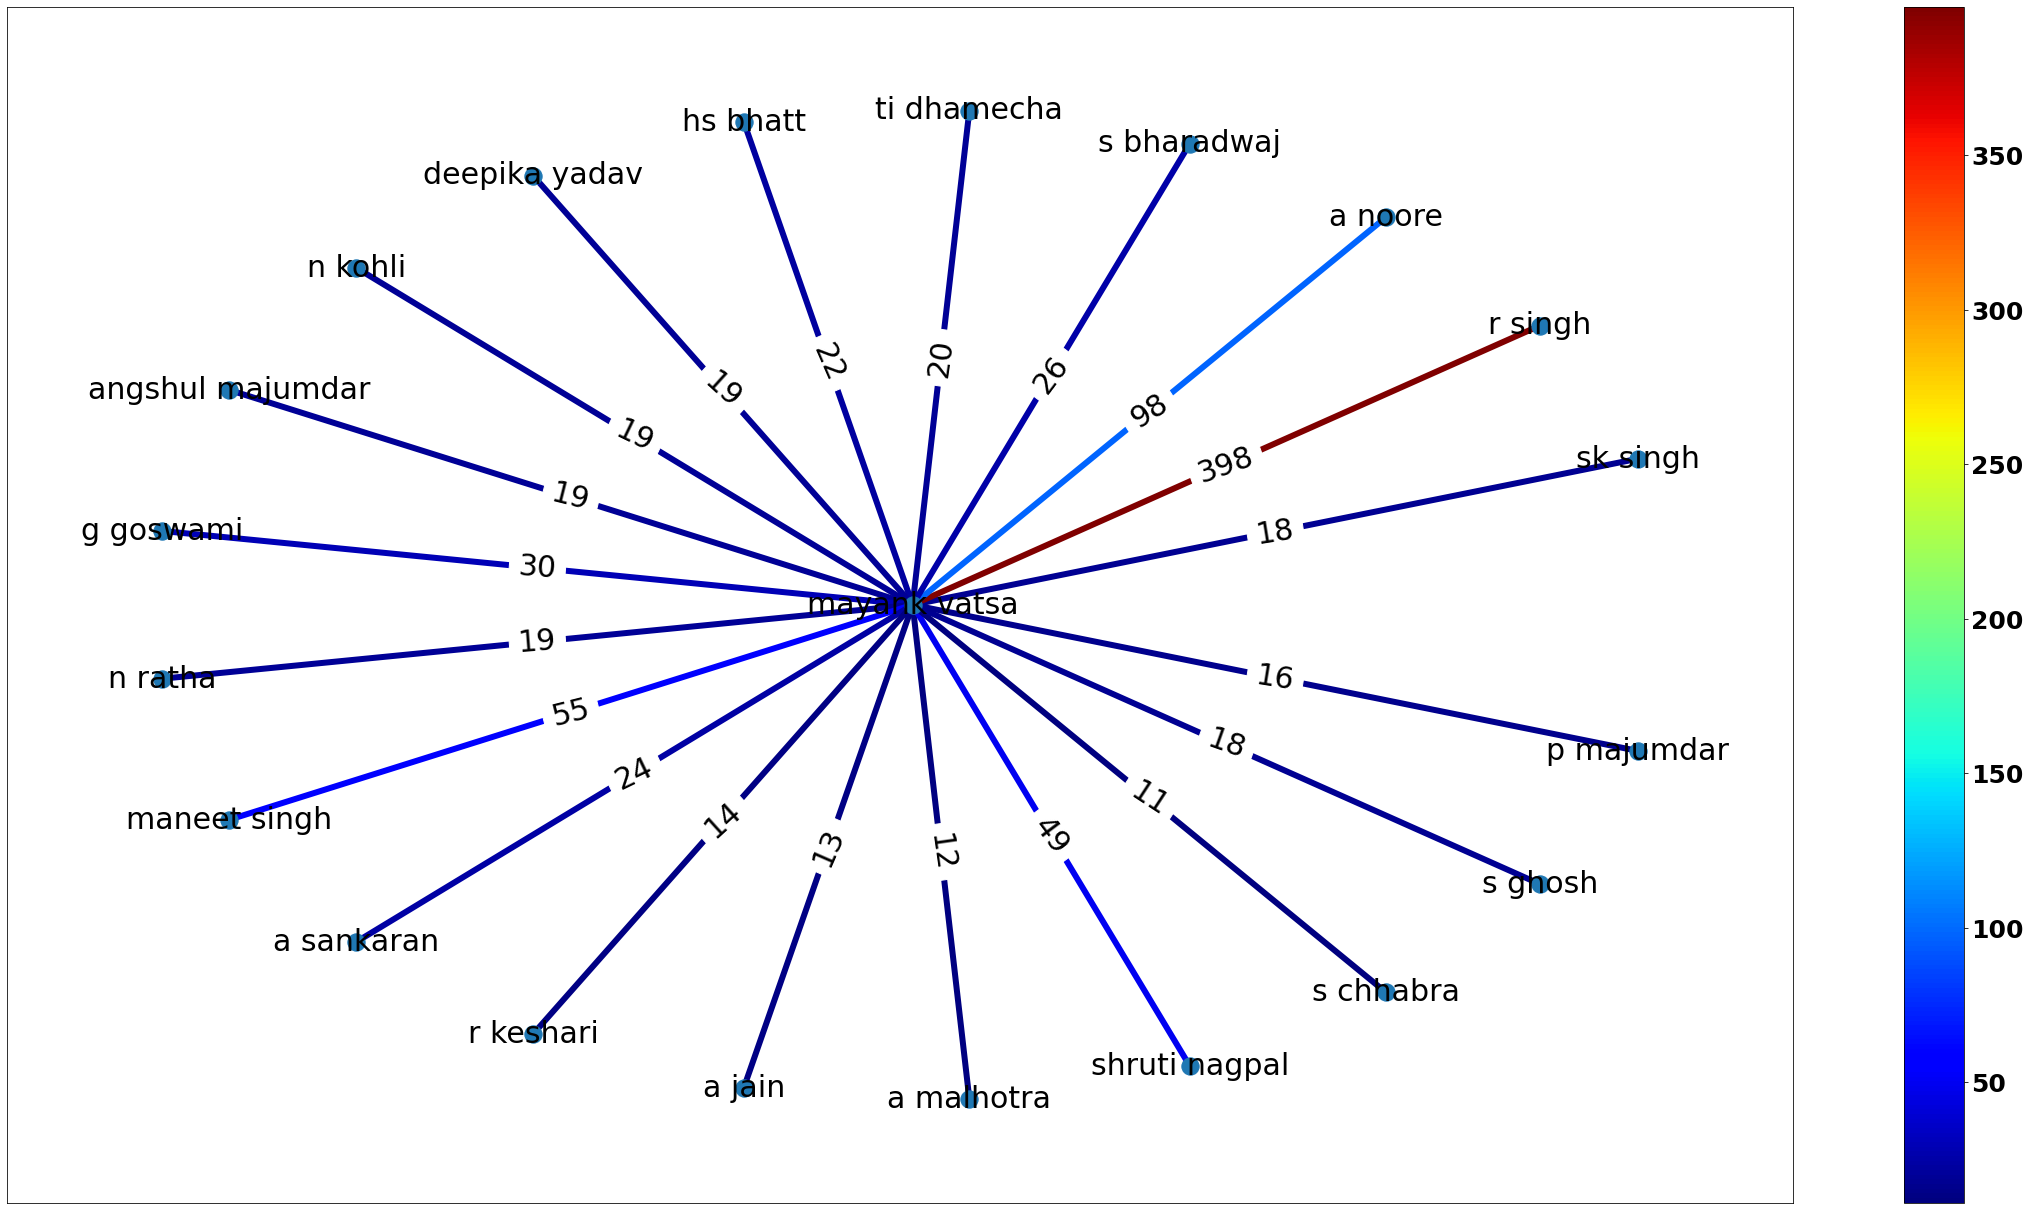

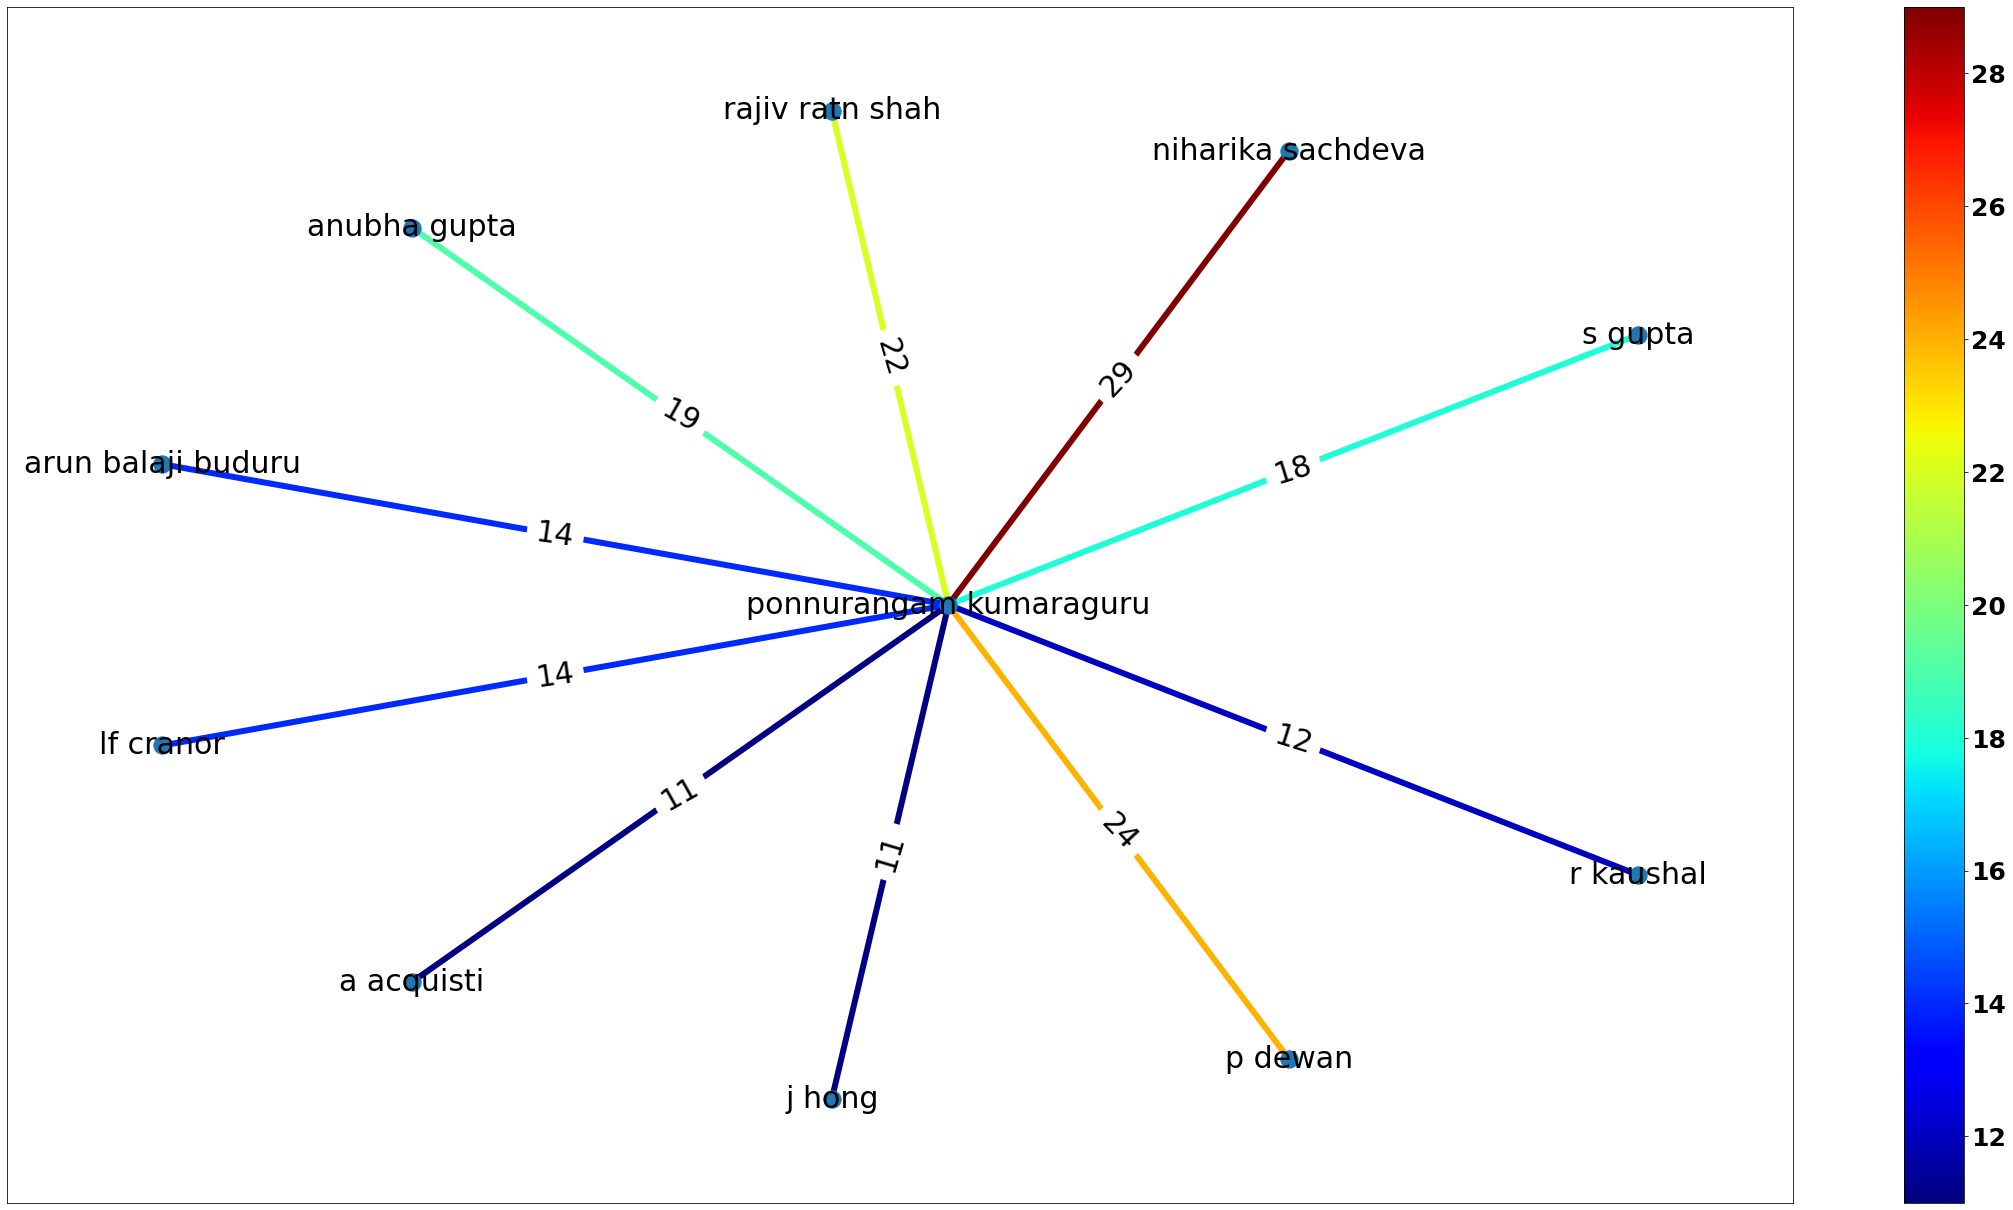

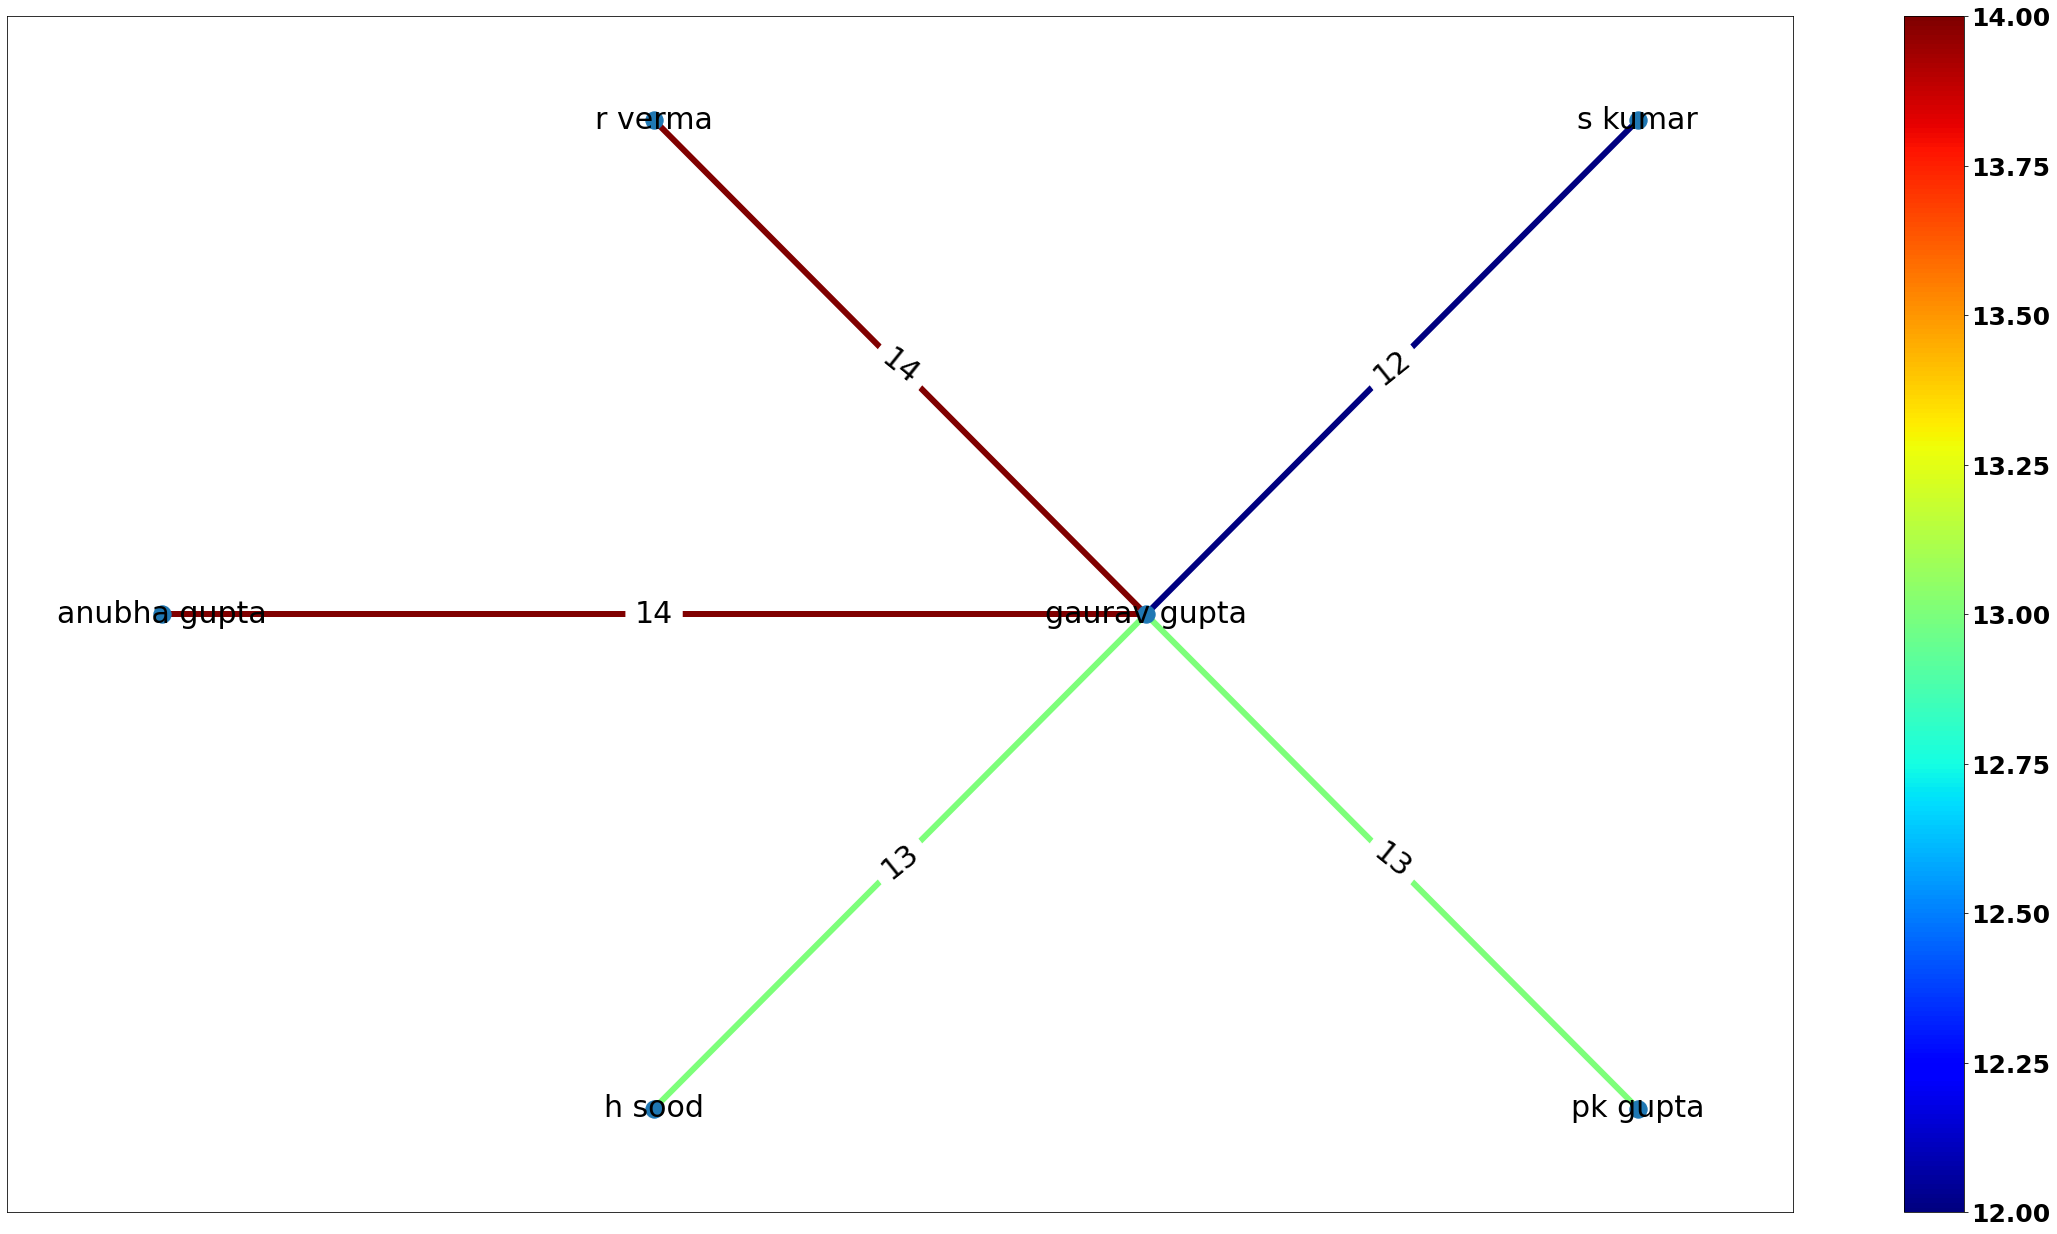

In [283]:
for author in authors:
    draw_heterogenous_graph(author)